# Problem Statement

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit card services would lead the bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and the reason for same – so that the bank could improve upon those areas.

You as a Data Scientist at Thera Bank need to explore the data provided, identify patterns, and come up with a classification model to identify customers likely to churn, and provide actionable insights and recommendations that will help the bank improve its services so that customers do not renounce their credit cards.

# Data Dictionary

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: The gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in the 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in the 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# Import Necessary Libraries

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


In [2]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
from os import system
import seaborn as sns
import matplotlib.pyplot as plt

# To create Standard Scaling
from sklearn.preprocessing import StandardScaler

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#To create train test split
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To impute missing value
from sklearn.impute import SimpleImputer

# To conduct grid search and random search cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To create models
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# To calculate the model score
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

pd.set_option('display.max_rows', None)

In [3]:
## Mounting Drive
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/Great Learning/Projects")

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


# Loading Data

In [4]:
# Reading the data
data = pd.read_csv("Data/BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
# Converting all object Datatype to Categorical
cat_col = data.select_dtypes("object").columns.tolist()
cat_col.append("CLIENTNUM")

for col in cat_col:
  data[col] = data[col].astype("category")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  category
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [7]:
# 5 Summary stat of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


# Check missing value

In [8]:
data.isna().sum().apply(lambda x: x/len(data)*100)

,0
CLIENTNUM,0.000000
Attrition_Flag,0.000000
Customer_Age,0.000000
Gender,0.000000
Dependent_count,0.000000
Education_Level,14.999506
Marital_Status,7.396070
Income_Category,0.000000
Card_Category,0.000000
Months_on_book,0.000000


There are no missing values except for Education_Level and Marital_Status. \
**Education_Level** has **15%** missing values. \
**Marital_Status** has **7.5%** missing values. \
These values can be imputes during data pre-processing.

# Checking Unique Values

In [9]:
cat_col = data.select_dtypes("category").columns

for col in cat_col:
  if col != "CLIENTNUM":
    print(data[col].value_counts())
    print("-----------------------------------------------")

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
-----------------------------------------------
Gender
F    5358
M    4769
Name: count, dtype: int64
-----------------------------------------------
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
-----------------------------------------------
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
-----------------------------------------------
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
-----------------------------------------------
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
-----------------------------------------------


* There are 8500 Existing Customer and 1627 Attrited Customers
* There are 5358 Female Customers and 4769 Male Customers
* There are 3128 Graduate, 2013 High School, 1487 Uneducated, 1013 College, 516 Post Graduate and 451 Doctorate customers
* There are 4687 Married Customers, 3943 Single Customers and 748 Divorced Customers
* There are 5 Income Categories, however "abc" seems like a wrong category. This category can be replaced with the highest occuring category i.e. "Less than $40K"
* There are 4 categories for Card_Category. However Platinum has very less categories and hence Gold and Platinum Card Holders can merged together

In [10]:
data = data.replace({"Income_Category": {"abc": "Less than $40K"},
              "Card_Category": {"Platinum": "Gold"}})

In [11]:
for col in cat_col:
  if col != "CLIENTNUM":
    print(data[col].value_counts())
    print("-----------------------------------------------")

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
-----------------------------------------------
Gender
F    5358
M    4769
Name: count, dtype: int64
-----------------------------------------------
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
-----------------------------------------------
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
-----------------------------------------------
Income_Category
Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64
-----------------------------------------------
Card_Category
Blue      9436
Silver     555
Gold       136
Name: count, dtype: int64
-----------------------------------------------


# Exploratory Data Analysis

In [12]:
def plot_countplot(col_name, data=data, labels=None, rotation=0, hue=None, perc=False):
  """Function to plot a bar chart for categorical variables
  col_name: Name of column in DataFrame
  data: DataFrame to be passed, (default:data)
  labels: List of labels in the axis
  rotation: Rotation of the labels
  hue: Column name by which the bar chart will be demarcated
  perc: To show percentage on the barchart
  """

  counts = data[col_name].value_counts().sort_index()
  if hue != None:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=hue);
  else:
    count_plot = sns.countplot(data=data, x=col_name, order=list(counts.index), hue=col_name);
    for i,count_ in enumerate(counts.tolist()):
      if perc==True:
        count_plot.annotate(f"{str(round(count_/len(data)*100, 2))}%", xy=(i,count_), horizontalalignment="center");
      else:
        count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  if labels != None:
    count_plot.set_xticklabels(labels, rotation=rotation);
  else:
    count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=rotation);

In [13]:
def plot_histogram_countplot_boxplot(col_name, histplot=False, hue=None, show_fliers = False, categorical = False):
  """ Function to plot Histogram/Countplot and Boxplot for numerical data
  col_name: Name of the column
  histplot: Whether to plot histogram or not (default: False, if True, countplot is plotted)
  hue: Column name by which the bar chart will be demarcated

  returns: Plot
  """

  counts = data[col_name].value_counts().sort_index().tolist()
  if show_fliers == True:
    fig, axes = plt.subplots(3,1,figsize=(15,10));
  elif categorical == True:
    fig, axes = plt.subplots(1,1,figsize=(15,10));
  else:
    fig, axes = plt.subplots(2,1,figsize=(15,10));
  if histplot == True:
    if categorical == True:
      count_plot = sns.histplot(data=data, x=col_name, kde=True, hue=hue);
    else:
      count_plot = sns.histplot(data=data, x=col_name, ax=axes[0], kde=True, hue=hue);
  else:
    if categorical == True:
      count_plot = sns.countplot(data=data, x=col_name, ax=axes[0]);
    else:
      count_plot = sns.countplot(data=data, x=col_name, ax=axes[0]);
  if hue == None and histplot==False:
    for i,count_ in enumerate(counts):
      count_plot.annotate(str(count_), xy=(i,count_), horizontalalignment="center");
  if categorical == False:
    axes[0].axvline(x=data[col_name].mean(), color="r");
  if categorical == False:
    box_plot = sns.boxplot(data=data, x=col_name, ax=axes[1], showmeans=True, hue=hue);
    if show_fliers == True:
      box_plot = sns.boxplot(data=data, x=col_name, ax=axes[2], showmeans=True, hue=hue, showfliers=False);
  return count_plot

## Univariate Analysis

In [14]:
print(data.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


### CLIENTUM

In [15]:
data["CLIENTNUM"].nunique()

10127

There are 10127 customers in the data

### Attrition_Flag

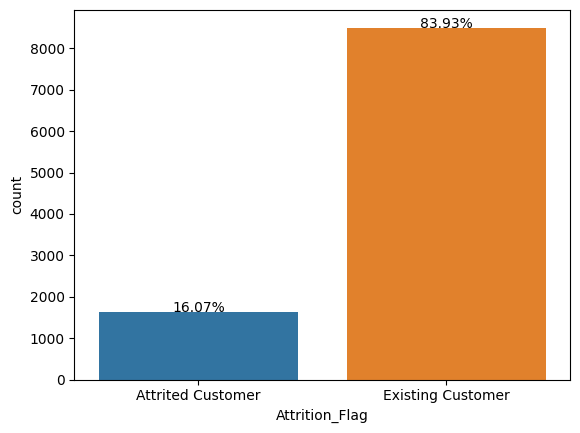

In [16]:
plot_countplot(col_name="Attrition_Flag", perc=True)

Approx. 84% of the customers are Existing Customers and 16% of the customers are Attrited Customers. \
The Attrition Rate is still a little higher and the model should be able to reduce this rate.

### Customer_Age

<Axes: xlabel='Customer_Age', ylabel='Count'>

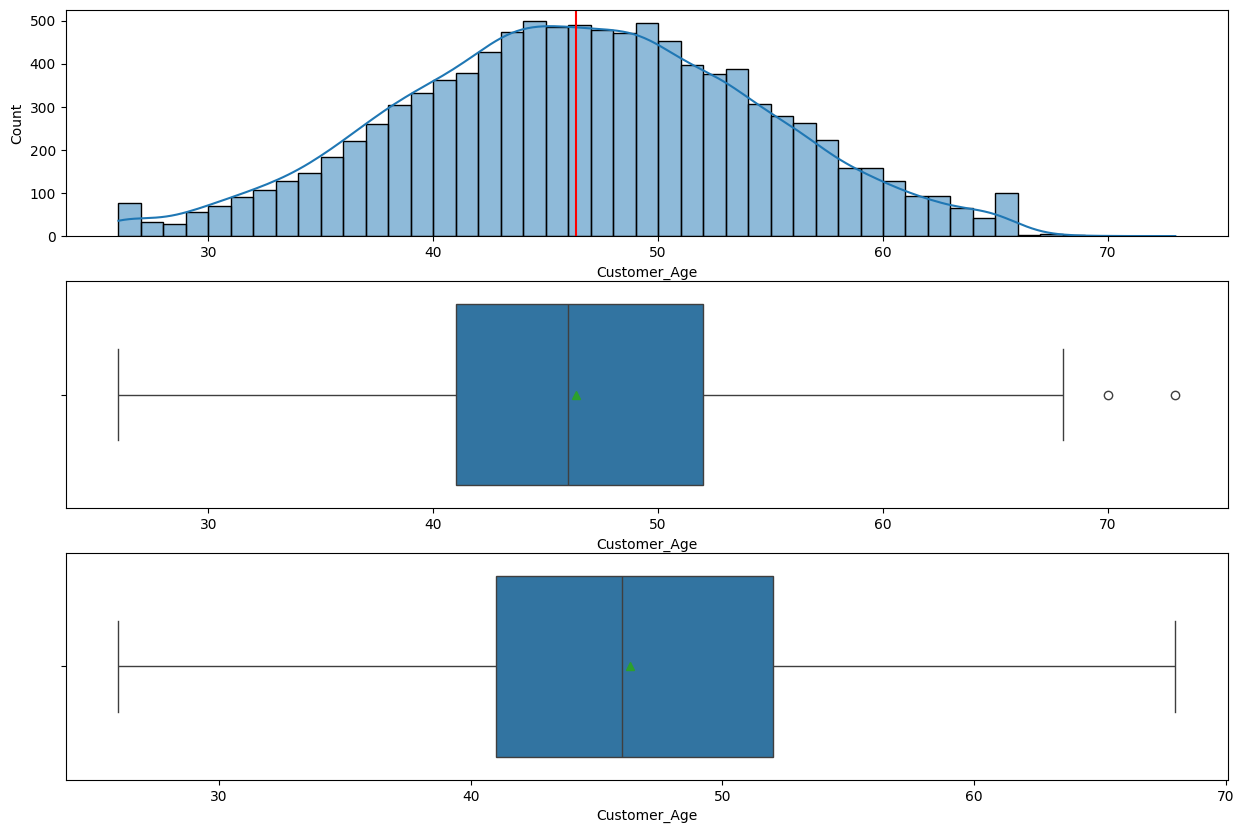

In [17]:
plot_histogram_countplot_boxplot(col_name="Customer_Age", histplot=True, show_fliers=True)

The distribution for **Customer_Age** follows a normal distrbution with most of the customers' age concentrated between 40 and 52 years of age. However there are a few outliers. We can clip to the highest non-outlier value.

### Gender

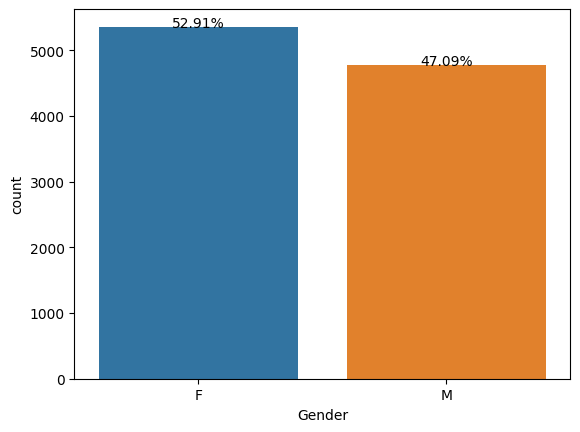

In [18]:
plot_countplot(col_name="Gender", perc=True)

The customers have an almost equal distribution in favour of "Female" Customers.

### Dependent_Count

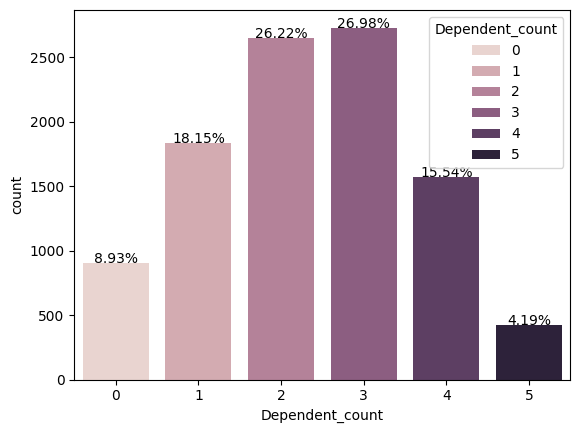

In [19]:
plot_countplot(col_name="Dependent_count", perc=True)

53% of the customers have 2 or 3 dependents and this is the highest.
The lowest is having 5 dependents with only 4.19% of the customers.
Approx. 9% of the customers do not have any dependents.
18.15% of the customers have 1 dependent and 15.5% of the customer have 4 dependents

### Education_Level

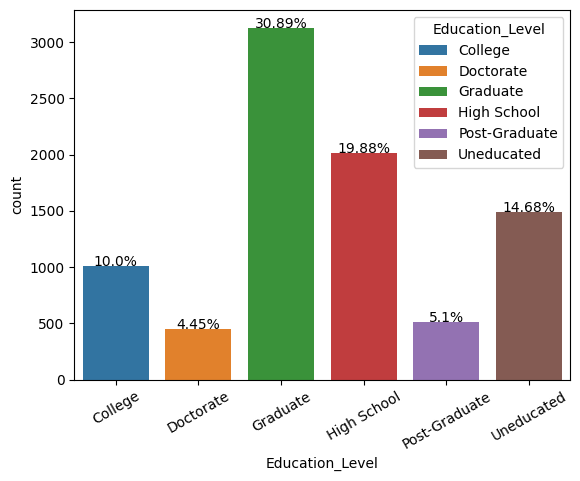

In [20]:
plot_countplot(col_name="Education_Level", perc=True, rotation= 30)

Majority of the customers are graduate, followed by High School certifications. \
10% of the customers have a college-level education.  \
5.1% of the customers are Post-Graduates whereas 4.45% of the customers are Doctorates \
14.7% of the customers are Uneducated.

### Marital_Status

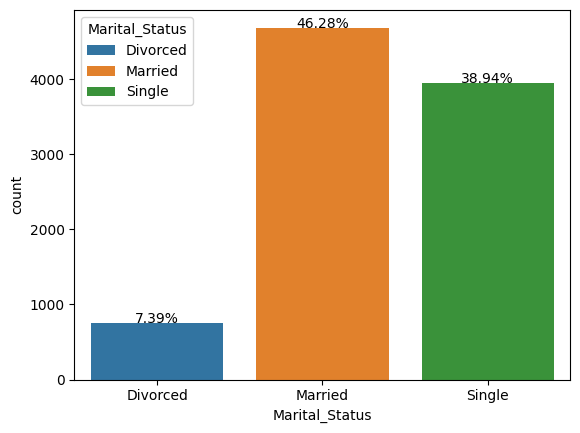

In [21]:
plot_countplot(col_name="Marital_Status", perc=True)

46% of the customers are married and 39% of the customers are single. \
The Lowest proporttion of customers are of Divorced people. \
We do not know of the marital status of the remaining 8% of customers.


### Income_Category

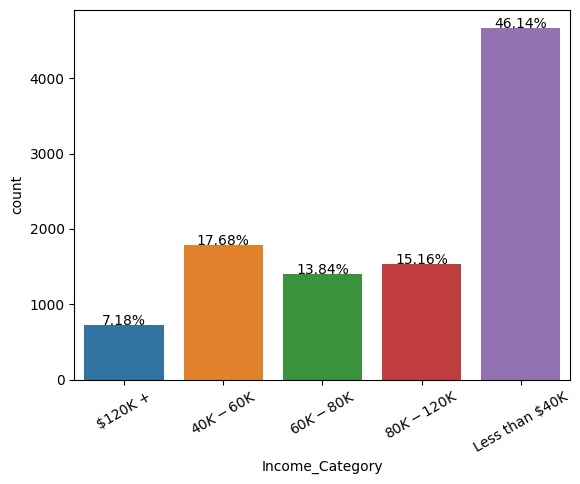

In [22]:
plot_countplot(col_name="Income_Category", perc=True, rotation=30)

There is a wrong category of abc which needs to be imputed. \
Majority of the customers belong to the Less than $40K category. \
Distribution between \$40K-\$60K, \$60K-\$80K, \$80K-\$120K follow a similar trend with 17.6%, 13.84% and 15.16% of the customer respectively. \
7.18% of the customers belong to a High Income Category of \$120K+  

### Card_Category

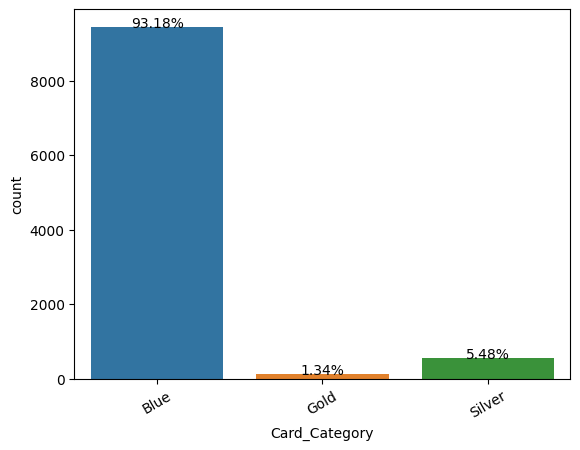

In [23]:
plot_countplot(col_name="Card_Category", perc=True, rotation=30)

93% of the customers hold a Blue Card whereas 5.48% of the customers hold a Silver card. \
1.15% and 0.2% of the customers hold Gold and Platinum Cards. These customers can be considered as premium customers

### Months_on_book

<Axes: xlabel='Months_on_book', ylabel='Count'>

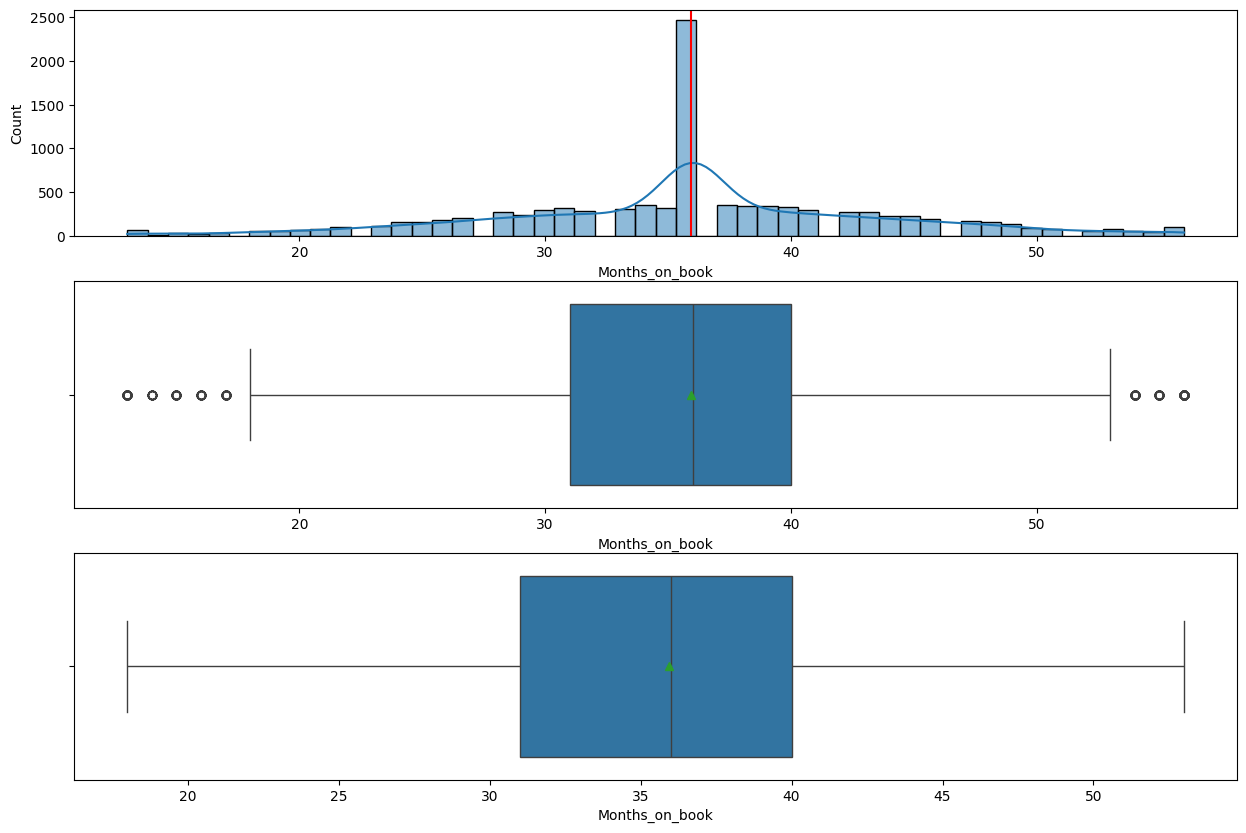

In [24]:
plot_histogram_countplot_boxplot(col_name="Months_on_book", histplot=True, show_fliers=True)

There is a huge peak at 36 months and the distribution is almost symmetric around it this time period.
This distribution follows a normal distribution

### Total_Relationship_Count

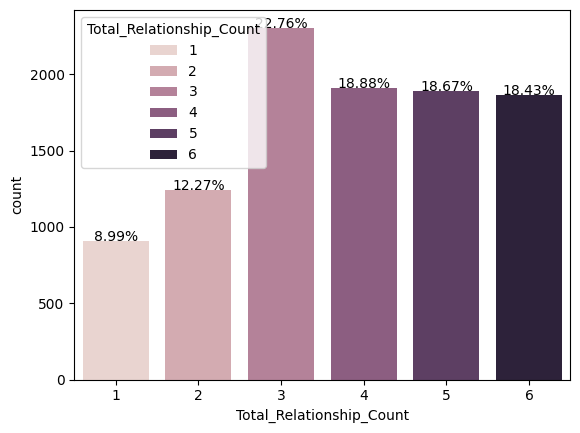

In [25]:
plot_countplot(col_name="Total_Relationship_Count", perc=True)

22.76% of the customers have held 3 products from the bank. \
However, customers are also keen on having more than 3 products as seen in the graph. 18.8%, 18.6% and 18.4% of the customers hold 4,5 and 6 products respectively. \
9% and 12.27% of the customers hold 1 and 2 products respectively. \

### Months_Inactive_12_mon

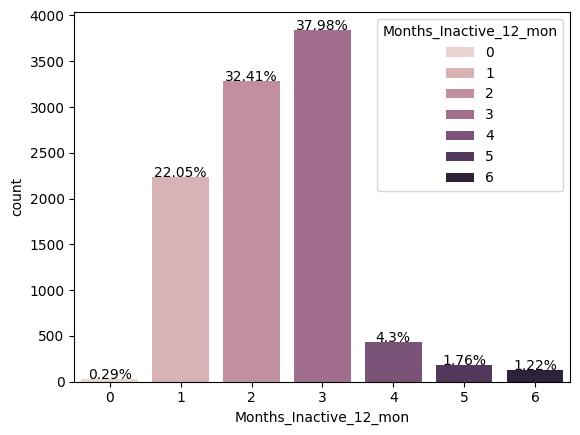

In [26]:
plot_countplot(col_name="Months_Inactive_12_mon", perc=True)

* Approximately 0.3% of the customers are active users for every month.
* Majority of the customers remain inactive for 1, 2 and 3 months.
* However the customers who remain inactive for 4, 5 and 6 months are very less.
* None of the customers are inactive for more than 6 months.

### Contacts_Count_12_mon

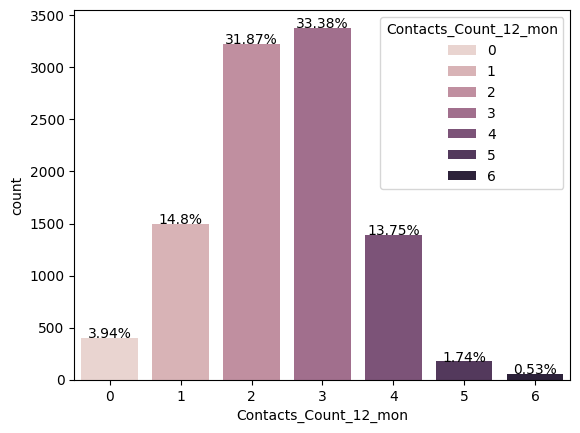

In [27]:
plot_countplot(col_name="Contacts_Count_12_mon", perc=True)

* This distribution follows a similar distribution to Inactive Months distribution.
* Majority of the customers needed to contact the bank only 2 and 3 times in the last 12 months
* only 2.5% of the customers had to contact the bank more than 5 times in the last 12 months

### Credit_Limit

<Axes: xlabel='Credit_Limit', ylabel='Count'>

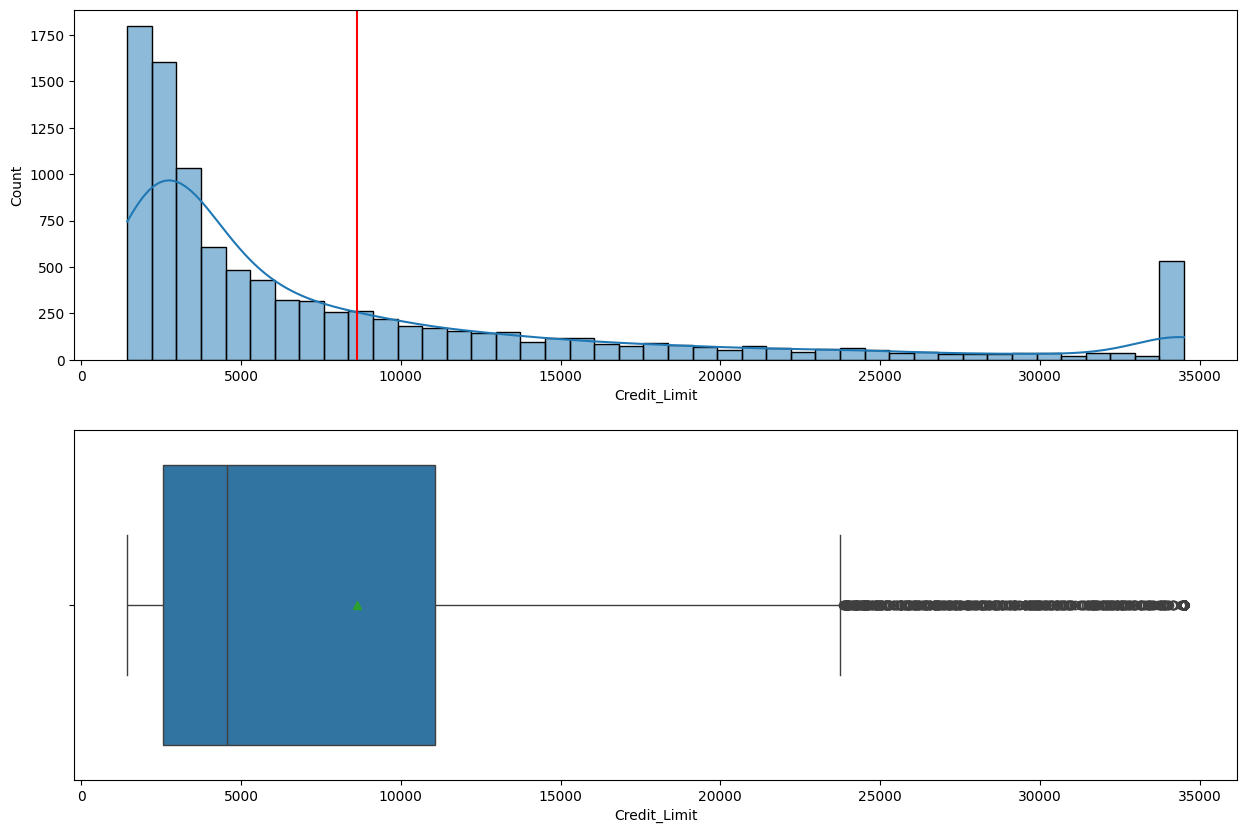

In [28]:
plot_histogram_countplot_boxplot(col_name="Credit_Limit", histplot=True)

This distribution is highly right skewed. This is indicative about the fact that lower credit limits are given to many people but few are upgraded to higher credit limits. \
On an average, the credit limit provided is around $8500.  

### Total_Revolving_Bal

<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

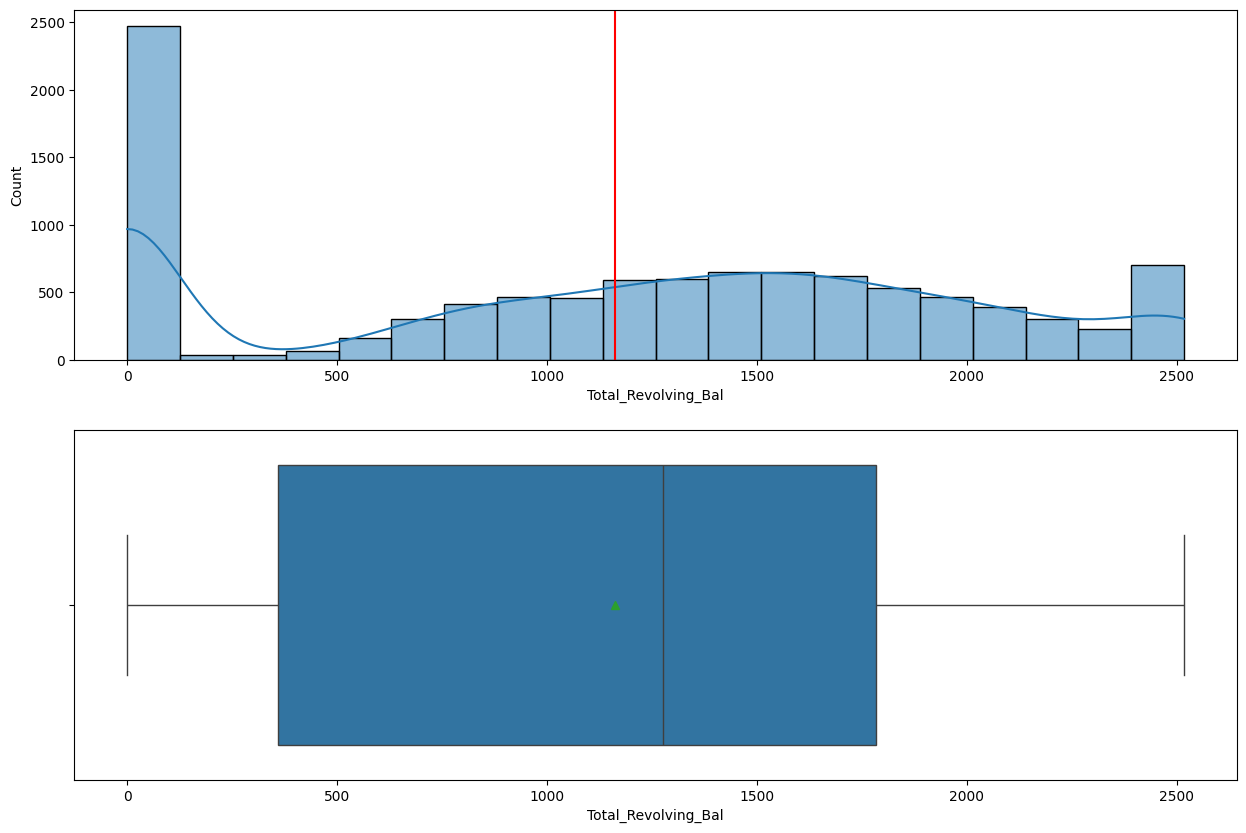

In [29]:
plot_histogram_countplot_boxplot(col_name="Total_Revolving_Bal", histplot=True)

The distribution follows a normal distribution except in the beginning where the revolving balance is very low. These customers have a tendency of using their entire credit limit. \
However the maximum revolving balance is $2500.

### Avg_Open_To_Buy

<Axes: xlabel='Avg_Open_To_Buy', ylabel='Count'>

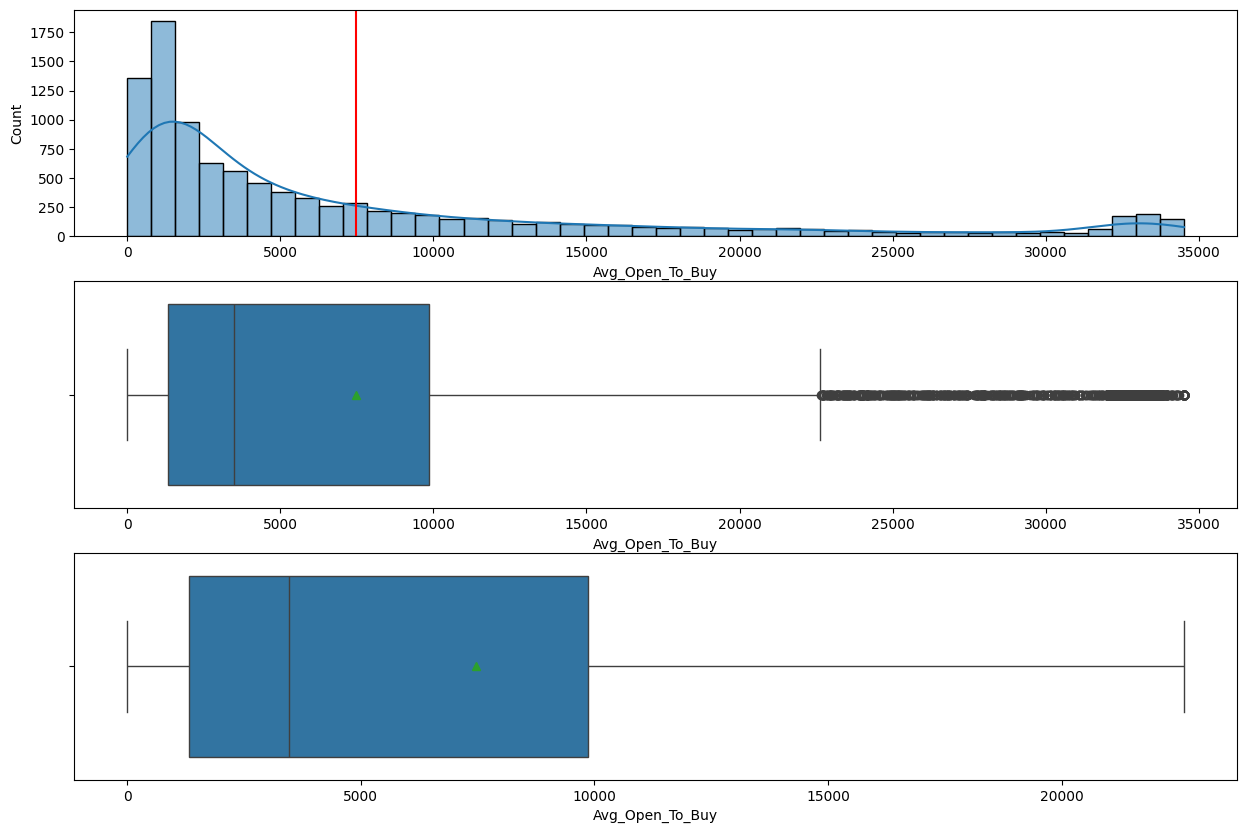

In [30]:
plot_histogram_countplot_boxplot(col_name="Avg_Open_To_Buy", histplot=True, show_fliers=True)

This distribution is highly right skewed  indicating that many customers a good balance in their credit cards left to use and the utilization is pretty low.

### Total_Trans_Amt

<Axes: xlabel='Total_Trans_Amt', ylabel='Count'>

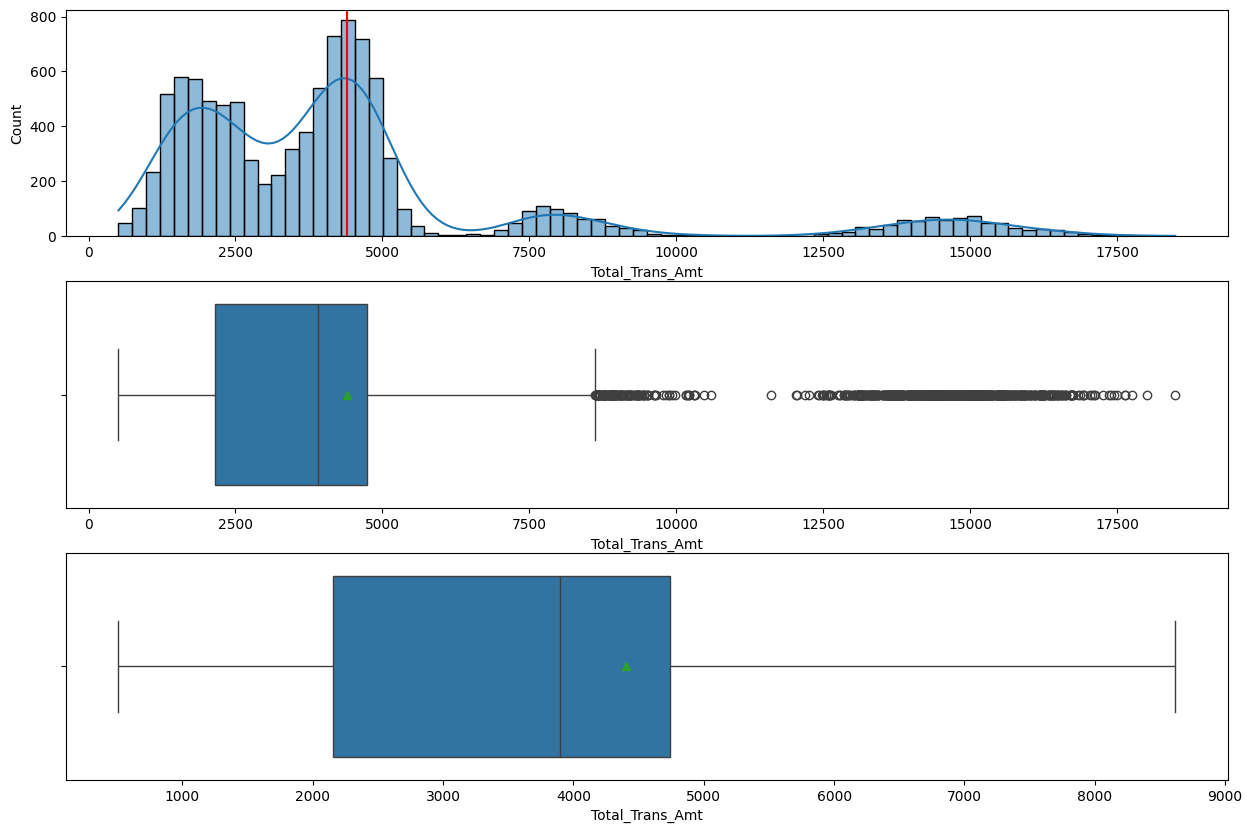

In [31]:
plot_histogram_countplot_boxplot(col_name="Total_Trans_Amt", histplot=True, show_fliers=True)

Total Transaction Amount is a right skewed distribution however this distribution has multiple peaks showing smaller sections of normal distribution. \
This shows that within smaller groups, the transaction amounts tend to peak in the middle.

### Total_Trans_Ct

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

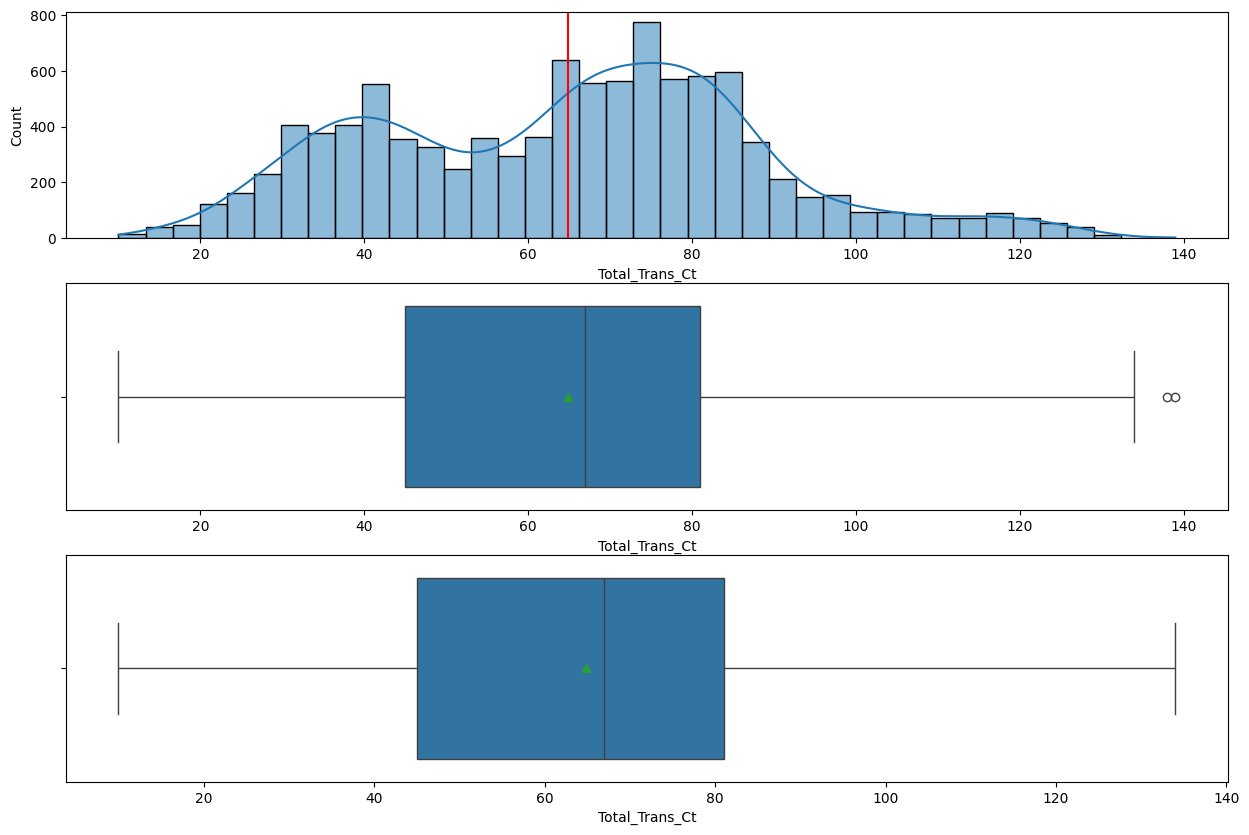

In [32]:
plot_histogram_countplot_boxplot(col_name="Total_Trans_Ct", histplot=True, show_fliers=True)

Total number of transactions are 140. However, majority of the customers have conducted 40 and around 70 transactions. \
This distribution also follows a double normal distribution.

### Total_Ct_Chng_Q4_Q1

<Axes: xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

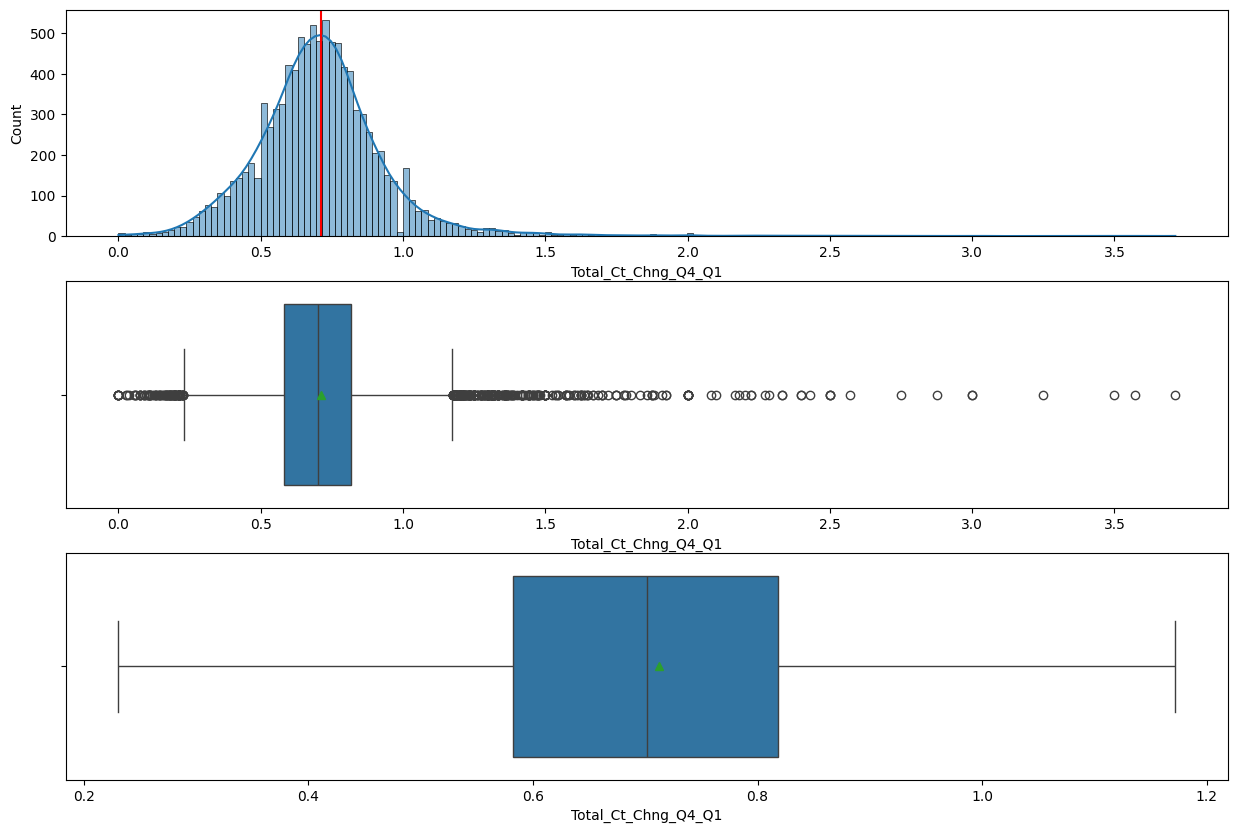

In [33]:
plot_histogram_countplot_boxplot(col_name="Total_Ct_Chng_Q4_Q1", histplot=True, show_fliers=True)

The Ratio of Transaction Count between Q4 and Q1 peaks at 0.7. There is a very constant decline after 1.2 showing that there are very customers who have used their cards in Q4 than Q1. \
The distribution is also normal however the after 1.2, it has right skewness

### Total_Amt_Chng_Q4_Q1

<Axes: xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

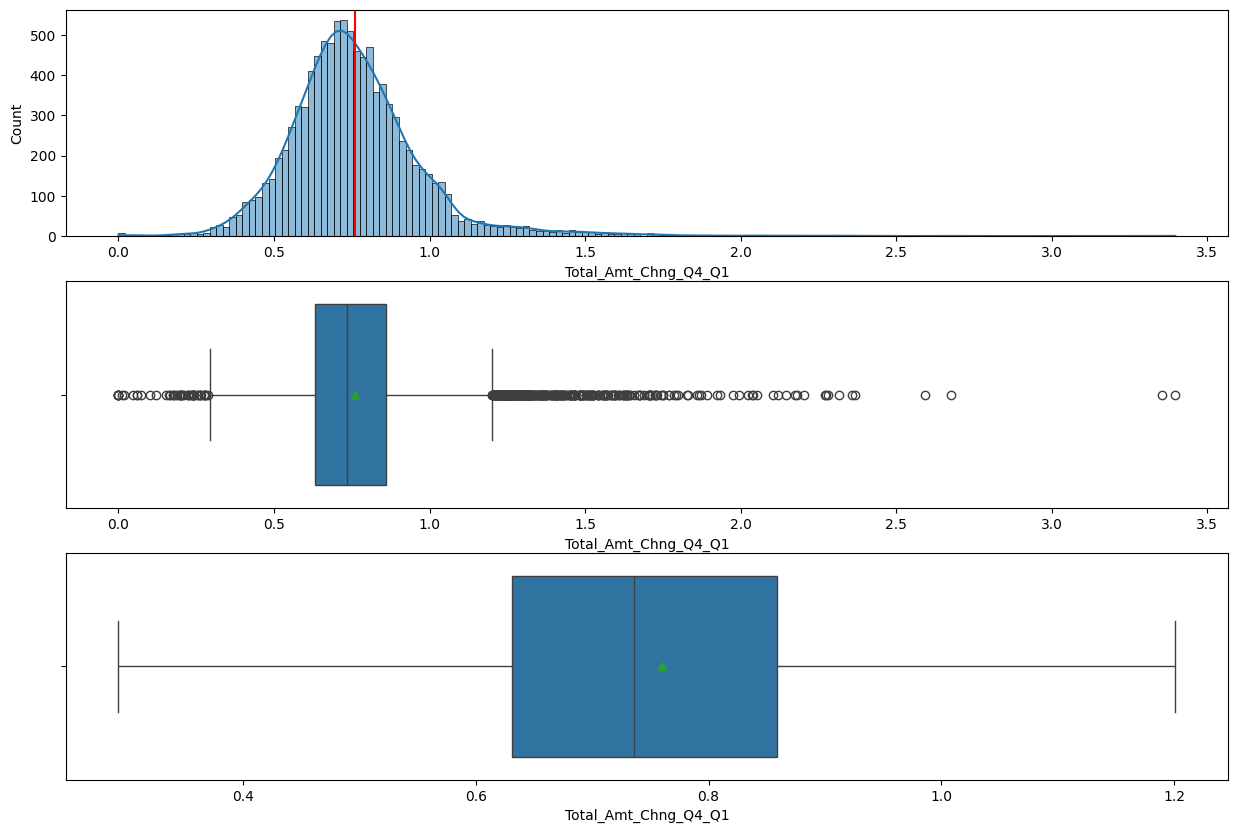

In [34]:
plot_histogram_countplot_boxplot(col_name="Total_Amt_Chng_Q4_Q1", histplot=True, show_fliers=True)

The Ratio of Transaction Amount between Q4 and Q1 peaks at 0.75. There is a very constant decline after 1.2 showing that there are very less customers who have used their cards in Q4 than Q1. \
The distribution is also normal however the after 1.2, it has right skewness

### Avg_Utilization_Ratio

<Axes: xlabel='Avg_Utilization_Ratio', ylabel='Count'>

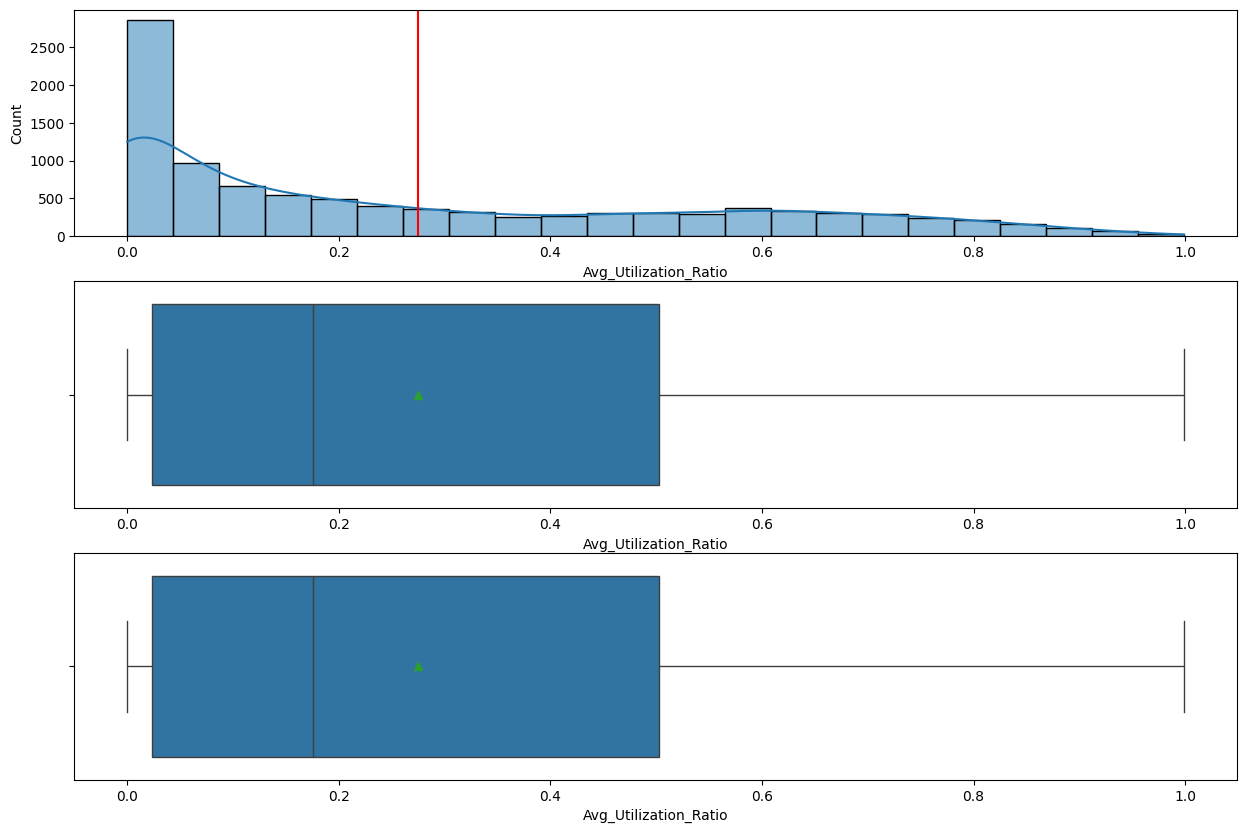

In [35]:
plot_histogram_countplot_boxplot(col_name="Avg_Utilization_Ratio", histplot=True, show_fliers=True)

This is a right skewed distribution indicating that the avg utlization ratio is very less among majority of the customers and this declines as the utlization ratio increases.

## Bivariate Analysis

### Correlation Among Numerical Variables

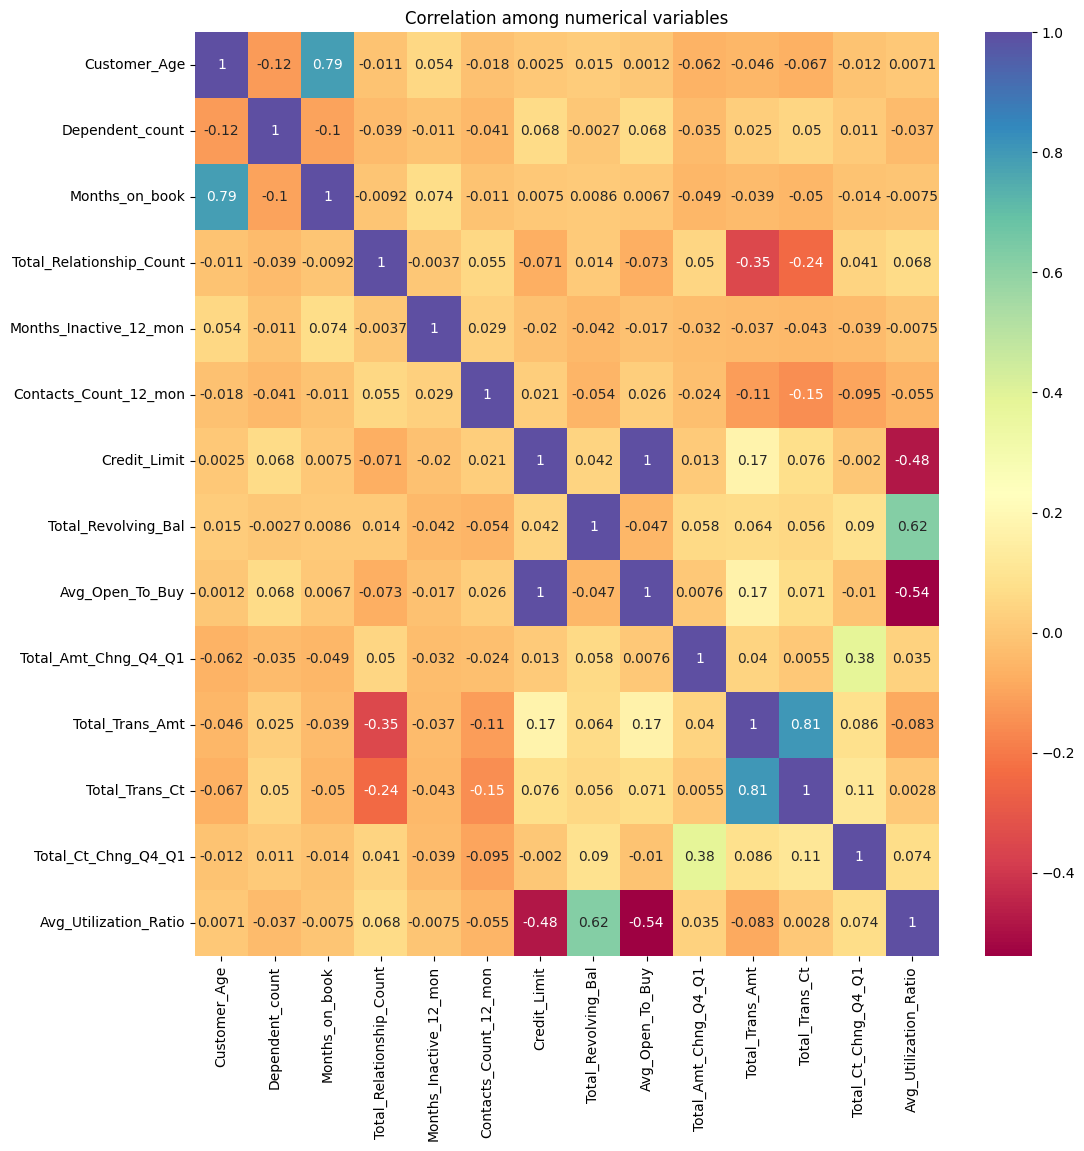

In [36]:
plt.figure(figsize=(12, 12))
corr_ = sns.heatmap(data.corr(numeric_only=True),annot=True, cmap="Spectral");
plt.title("Correlation among numerical variables");

### Pairplot among Numerical Variables

In [37]:
sns.pairplot(data);

Output hidden; open in https://colab.research.google.com to view.

### Pairplot w.r.t. Target Variable(Attrition_Flag)

In [38]:
%%time

sns.pairplot(data, hue="Attrition_Flag");

Output hidden; open in https://colab.research.google.com to view.

As seen from the above heatmap and pairplot, There are few correlations as follows:
* Positive Correlation
 * Customer_age and Months_On_Book
 * Credit_Limit and Avg_Open_to_Buy
 * Total_Revolving_Bal and Avg_Utilization_Ratio
 * Total_Trans_Amt and Total_Trans_Count

* Negative Correlation
 * Credit_Limit and Avg_Utilization_Ratio
 * Avg_Open_to_Buy and Avg_Utilization_Ratio

Positive Correlations are stronger whereas negative correlation exist but are weaker in comparison

### Categorical Analysis w.r.t. Target Variable

In [39]:
cat_col = data.select_dtypes(include="category").columns[2:]
cat_col

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

### Gender v/s Attrition_Flag

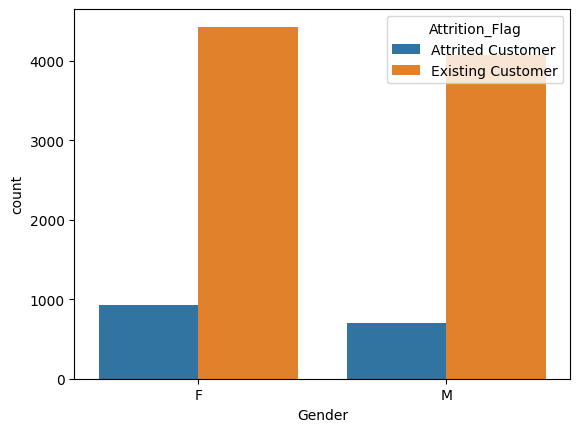

In [40]:
plot_countplot("Gender", hue="Attrition_Flag")

The proportion betweem Female and Male customers across both the Attrition Flag Groups are the same.

### Education_Level v/s Attrition_Flag

<Axes: xlabel='Education_Level', ylabel='Count'>

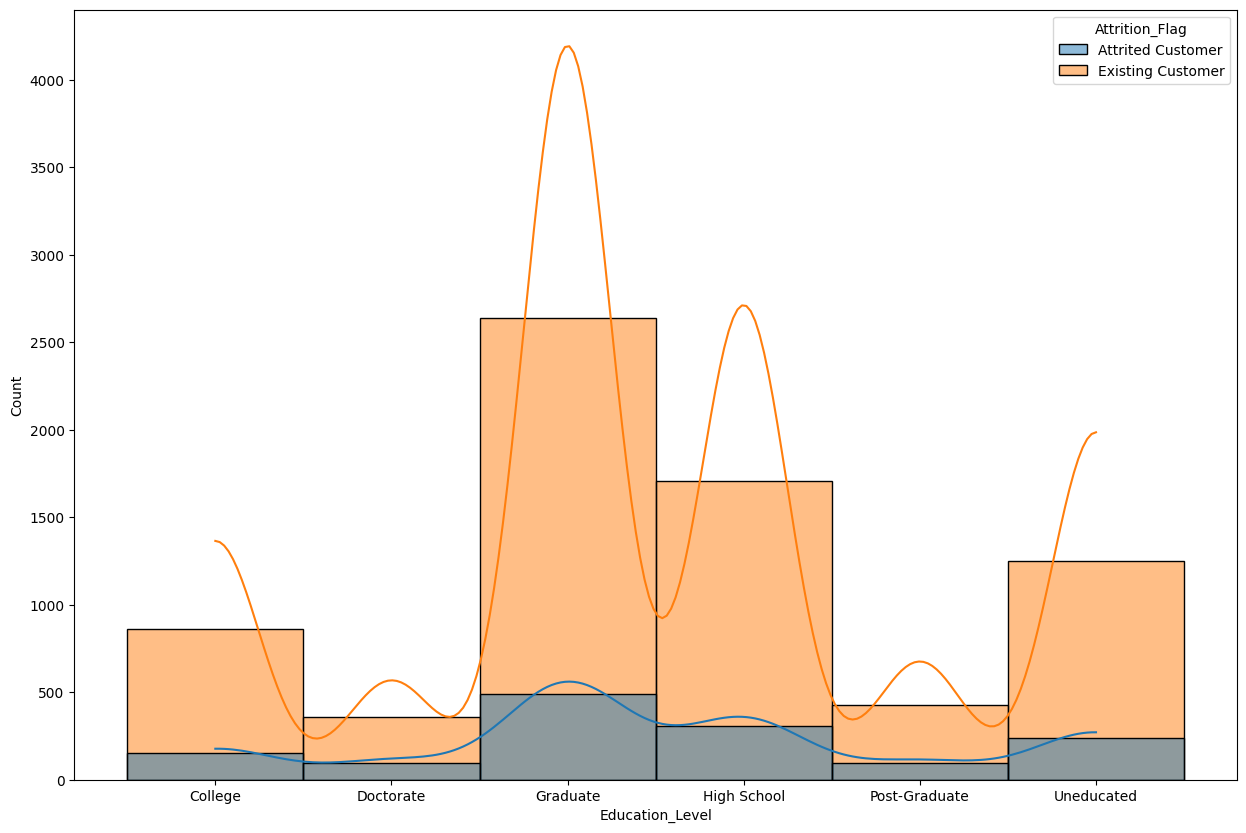

In [41]:
plot_histogram_countplot_boxplot("Education_Level", hue="Attrition_Flag", histplot=True, categorical = True)

The Distriution for both groups follow a similar pattern except for Post-Graduates. We can conclude that **Post-Graduate** and **Doctorates** are less likely to leave the bank product

### Marital_Status v/s Attrition_Flag

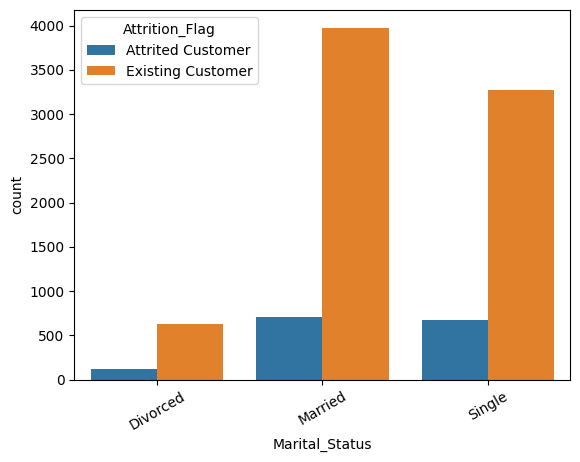

In [42]:
plot_countplot("Marital_Status", hue="Attrition_Flag", rotation=30)

From the above graph, it is evident that people who are divorced are more likely to get attrited

### Income_Category v/s Attrition_Flag

<Axes: xlabel='Income_Category', ylabel='Count'>

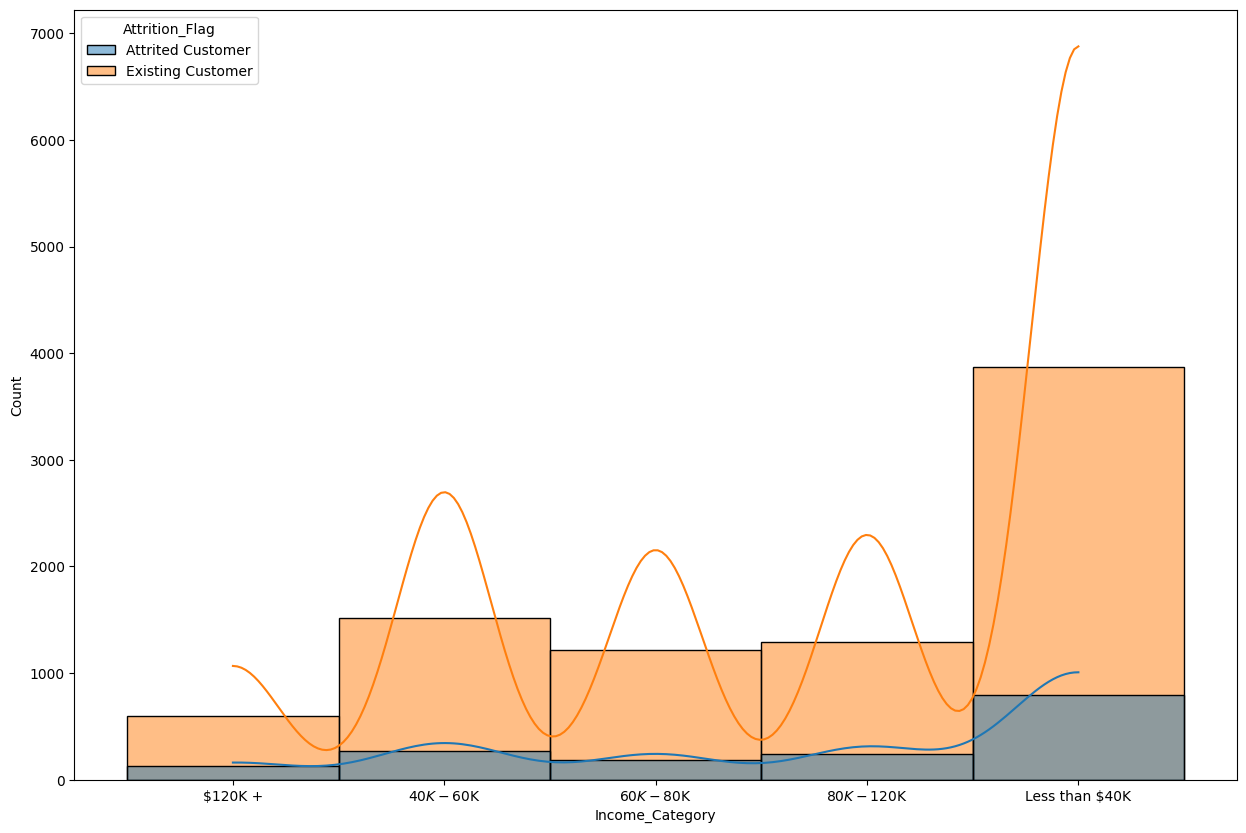

In [43]:
plot_histogram_countplot_boxplot("Income_Category", hue="Attrition_Flag", histplot=True, categorical = True)

As observed in the above plot. People belonging to lower incomes i.e below 60K, tend to get atritted more.
Customers belonging to 120K+ bracket tend to get attrited less

### Card_Category v/s Attrition_Flag

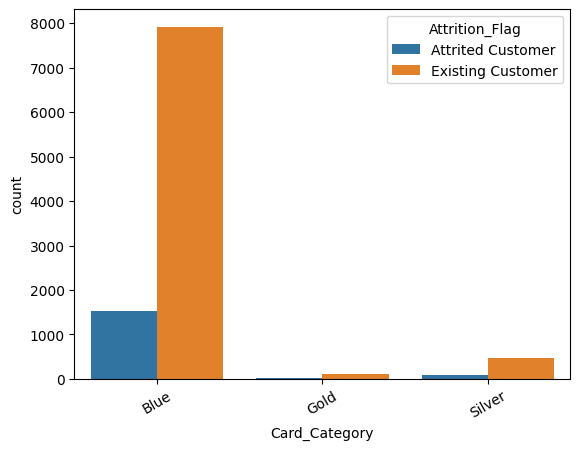

In [44]:
plot_countplot("Card_Category", hue="Attrition_Flag", rotation=30)

Maximum Attrition belongs to Blue Card Category and the least is Platinum

# Outlier Detection and Treatment

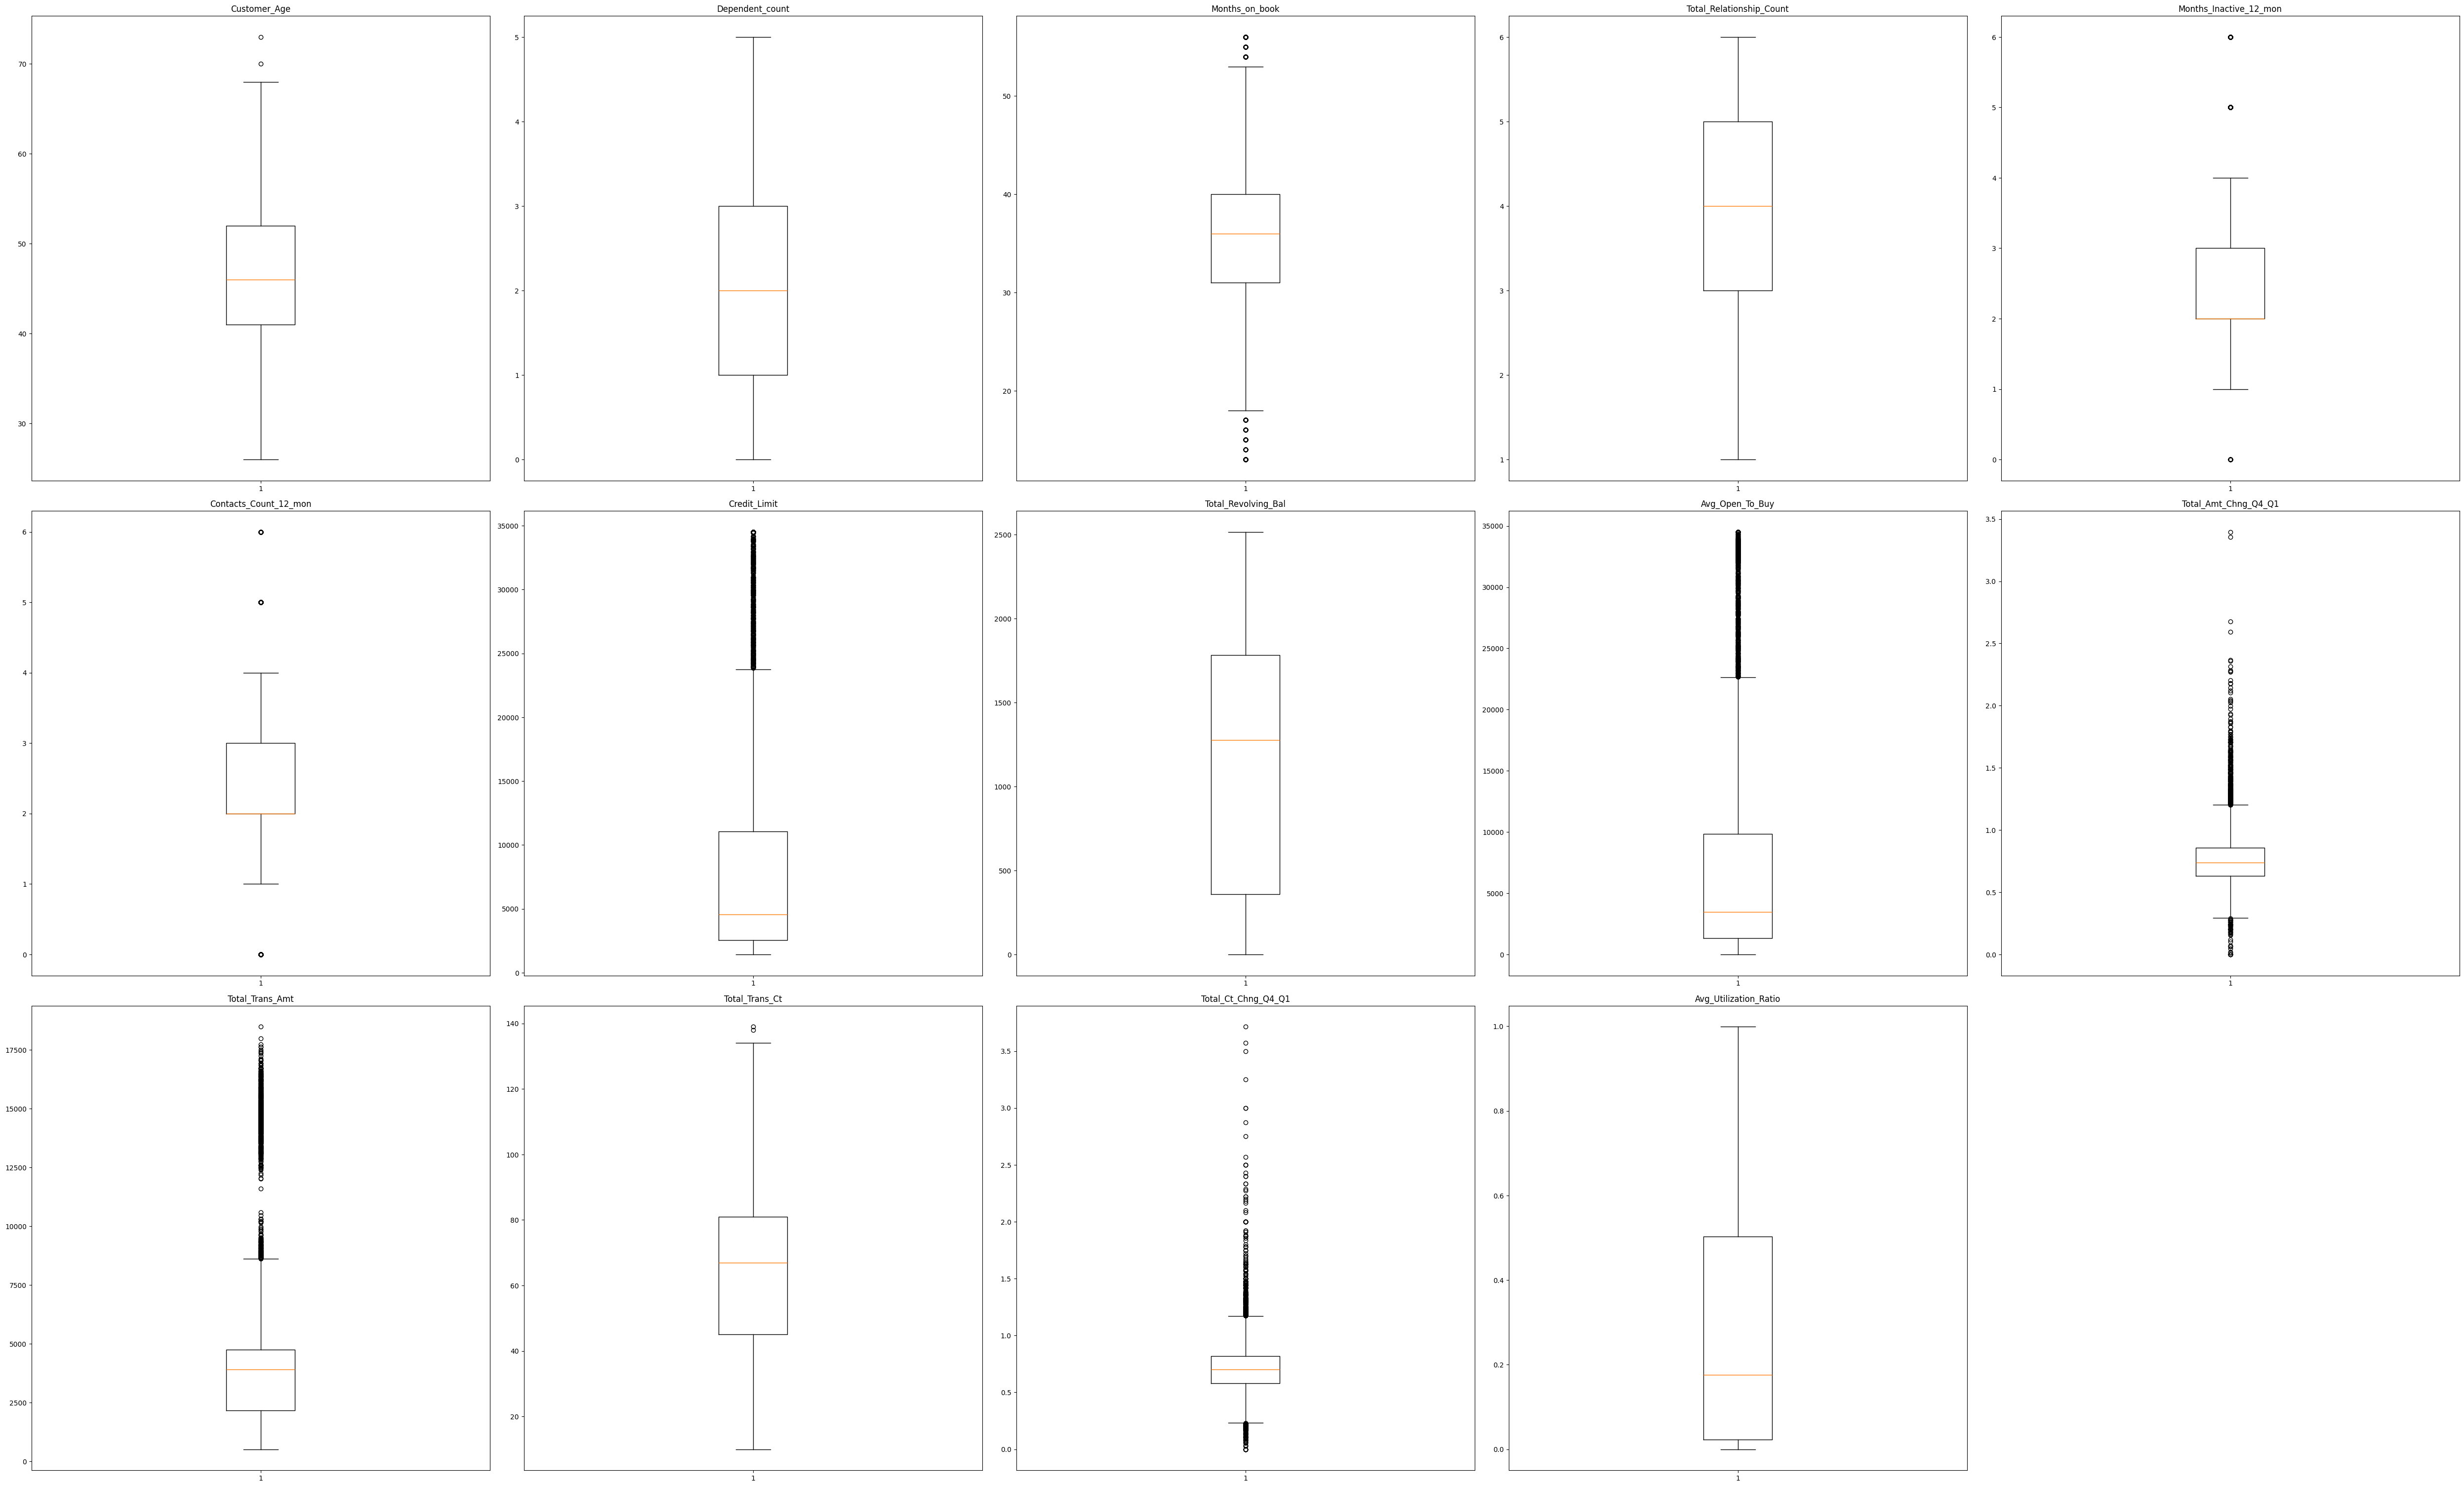

In [45]:
plt.figure(figsize=(50, 50))
col_list = data.select_dtypes(include=["number"]).columns

for i, variable in enumerate(col_list):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [46]:
data[data["Customer_Age"] > 65].value_counts("Customer_Age")

,count
Customer_Age,
67,4
66,2
68,2
70,1
73,1


* The Customer Age above 65 seems to be alright and correct hence no outlier detection is necessary

In [47]:
data[(data["Months_on_book"] > 50) | (data["Months_on_book"] < 20)].value_counts("Months_on_book")

,count
Months_on_book,
56,103
51,80
53,78
13,70
19,63
52,62
18,58
54,53
55,42


The category also seems to be of correct range hence no outlier detection seems necessary

In [48]:
data[data["Total_Trans_Ct"] > 130]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9213,719413383,Existing Customer,32,M,1,Uneducated,Single,$60K - $80K,Silver,36,2,3,1,33711.0,1437,32274.0,0.942,14880,134,0.654,0.043
9261,716430933,Existing Customer,46,F,4,NaN,Single,Less than $40K,Blue,36,2,1,2,3973.0,0,3973.0,0.890,13740,131,0.819,0.000
9269,711010683,Existing Customer,35,M,3,High School,Married,$40K - $60K,Blue,27,1,2,3,14382.0,1950,12432.0,0.578,12941,131,0.819,0.136
9324,708163758,Existing Customer,41,M,3,NaN,Married,$120K +,Blue,33,2,4,3,34516.0,638,33878.0,0.724,13085,139,0.675,0.018
9339,715728108,Existing Customer,27,F,0,Graduate,NaN,Less than $40K,Blue,36,1,1,2,4548.0,1450,3098.0,0.844,14330,131,0.638,0.319
9586,784868958,Existing Customer,56,F,1,High School,Married,Less than $40K,Blue,49,1,2,1,17542.0,2517,15025.0,0.800,13939,138,0.792,0.143
9629,709015833,Existing Customer,42,M,2,Graduate,Single,$60K - $80K,Silver,36,3,3,2,34516.0,0,34516.0,0.774,12920,132,0.737,0.000
9728,710699283,Existing Customer,46,M,2,Graduate,Single,$120K +,Blue,28,1,1,1,7790.0,1921,5869.0,0.789,14567,131,0.617,0.247
9841,715601808,Existing Customer,50,M,3,Graduate,Married,$120K +,Blue,41,4,2,3,34516.0,2253,32263.0,1.032,16692,131,0.795,0.065
10085,717714633,Existing Customer,49,M,3,Uneducated,Married,$120K +,Gold,38,4,3,4,14938.0,0,14938.0,0.737,15277,131,0.724,0.000


* For all the rest features as well, the range of the values seems okay and do not indicate any wrong range of values. Hence we can conclude there is no need to do any outlier detection.

# Encoding Categorical Variables

In [49]:
## Dropping CLIENTNUM as it refers to each row and Attrition Flag since it is the target variable
raw_X = data.drop(columns=["CLIENTNUM", "Attrition_Flag"])
# Setting the target variable
Y = data["Attrition_Flag"].replace({"Existing Customer": 0, "Attrited Customer": 1})
# Creating Dummy variables for categorical data
X = pd.get_dummies(raw_X, drop_first=True, dtype=int)

X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0,1,0,0,1,0,0,1,0,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,0,1,0,0,0,1,0,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,0,0,0,0,1,1,0,0,1,0,0,0,0


# Data Scaling

In [50]:
## Scaling the Data using Z-score Scaler
scaler = StandardScaler()

scaler.fit(X[col_list])
X[col_list] = scaler.transform(X[col_list])

# Splitting Data into Training, Validation and Testing

In [51]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 28) (2026, 28) (2026, 28)


# Missing Value Treatment

* Only Education_Level and Marital_Status have missing values.
* Since both the features are categorical in nature hence, median imputation is required

In [52]:
imputer = SimpleImputer(strategy="median")

To avoid data leakage, missing value treatment is done separately on train, validation and test dataset

In [53]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [54]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Card_Category_Gold                0
Card_Category_Silver        

# Model Building

### Model evaluation criterion:

Model can make wrong predictions as:

* Predicting that a customer will stay but in reality, the customer leaves (False Negative).
* Predicting that a customer will leave but in reality, the customer stays (False Positive).

**Which case is more important?**
If we predict that a customer will stay but in reality, the customer leaves (False Negative), the bank will lose a potential source of income from fees and transactions associated with the credit card. Additionally, the bank misses the opportunity to take retention measures, potentially leading to a long-term loss of trust and business.

If we predict that a customer will leave but in reality, the customer stays (False Positive), the bank may allocate resources unnecessarily, such as offering retention incentives to customers who were not at risk of leaving. While this involves some cost, the impact is less severe compared to False Negatives.

Hence, Thera Bank would want the Recall for the "Attrited Customer" class to be maximized. A higher Recall ensures fewer False Negatives, thereby improving the bank's ability to identify and retain customers likely to churn.

In [55]:
recall_scorer = metrics.make_scorer(metrics.recall_score)
accuracy_scorer = metrics.make_scorer(metrics.accuracy_score)
precision_scorer = metrics.make_scorer(metrics.precision_score)
f1_scorer = metrics.make_scorer(metrics.f1_score)

We will create two functions that calculates the metrics as well as creates the confusion matrix

In [56]:
def calculate_metrics_and_confusion_matrix(model, test_set, target, metrics=True, cm_=False, labels=None):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    test_set: independent variables
    target: dependent variable
    """
    y_pred = model.predict(test_set)

    if metrics:
      acc = accuracy_score(target, y_pred)  # to compute Accuracy
      recall = recall_score(target, y_pred)  # to compute Recall
      precision = precision_score(target, y_pred)  # to compute Precision
      f1 = f1_score(target, y_pred)  # to compute F1-score

      df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0])
      display(df_perf)
      return df_perf

    if cm_:
      if labels is None:
            labels = np.unique(target)

      cm = confusion_matrix(target, y_pred, labels=np.arange(len(labels)))

      cm_percent = cm / cm.sum() * 100  # Percentage of each cell
      cm_labels = np.array(
          [
              [f"{int(count)}\n({percent:.2f}%)" for count, percent in zip(row, row_percent)]
              for row, row_percent in zip(cm, cm_percent)
          ]
      )

      # Plot confusion matrix
      sns.heatmap(cm, annot=cm_labels, fmt="", cmap="Blues", xticklabels=labels, yticklabels=labels)
      plt.ylabel("True label")
      plt.xlabel("Predicted label")
      plt.title("Confusion Matrix with Percentages")
      plt.show()



def get_metrics_and_display_cm(model, x_testing=X_val, y_testing=y_val):
  print("Training Metrics and Confusion Matrix")
  df_train = calculate_metrics_and_confusion_matrix(model, test_set=X_train, target=y_train, metrics=True)
  display(calculate_metrics_and_confusion_matrix(model, test_set=X_train, target=y_train, metrics=False, cm_=True, labels=["Existing", "Attrited"]))

  print("Validation Metrics and Confusion Matrix")
  df_test = calculate_metrics_and_confusion_matrix(model, test_set=x_testing, target=y_testing, metrics=True)
  display(calculate_metrics_and_confusion_matrix(model, test_set=x_testing, target=y_testing, metrics=False, cm_=True, labels=["Existing", "Attrited"]))

  return df_train,df_test

## Initial Model Building

### Stratified K-fold Cross-Validation

In [57]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("DecisionTree", DecisionTreeClassifier(criterion = 'gini', random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=42)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Adaboost", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))

results_recall, results_accuracy, results_precision, results_f1 = [], [], [], []  # Empty list to store all model's CV  scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result_recall = cross_val_score(estimator=model, X=X_train, y=y_train, scoring = recall_scorer,cv=kfold)
    results_recall.append(round(cv_result_recall.mean(), 3))

    cv_result_accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, scoring = accuracy_scorer,cv=kfold)
    results_accuracy.append(round(cv_result_accuracy.mean(), 3))

    cv_result_precision = cross_val_score(estimator=model, X=X_train, y=y_train, scoring = precision_scorer,cv=kfold)
    results_precision.append(round(cv_result_precision.mean(), 3))

    cv_result_f1 = cross_val_score(estimator=model, X=X_train, y=y_train, scoring = f1_scorer,cv=kfold)
    results_f1.append(round(cv_result_f1.mean(), 3))

    names.append(name)


cross_validation_df = pd.DataFrame(index = names)
cross_validation_df["Accuracy"], cross_validation_df["Recall"], cross_validation_df["Precision"],  cross_validation_df["F1"]= results_accuracy, results_recall, results_precision, results_f1
display(cross_validation_df)

print("\n" "Validation Performance:" "\n")

val_recall, val_accuracy, val_precision, val_f1 = [], [], [], []
for name, model in models:
    model.fit(X_train, y_train)
    val_recall.append(round(recall_score(y_val, model.predict(X_val)), 3))
    val_accuracy.append(round(accuracy_score(y_val, model.predict(X_val)), 3))
    val_precision.append(round(precision_score(y_val, model.predict(X_val)), 3))
    val_f1.append(round(f1_score(y_val, model.predict(X_val)), 3))

val_df = pd.DataFrame(index = names)
val_df["Accuracy"], val_df["Recall"], val_df["Precision"], val_df["F1"]  = val_accuracy, val_recall, val_precision, val_f1

display(val_df)


Cross-Validation performance on training dataset:



,Accuracy,Recall,Precision,F1
DecisionTree,0.932,0.786,0.791,0.788
Bagging,0.950,0.795,0.881,0.835
Xgboost,0.963,0.864,0.905,0.884
Adaboost,0.950,0.813,0.871,0.841
GradientBoosting,0.960,0.817,0.925,0.867



Validation Performance:



,Accuracy,Recall,Precision,F1
DecisionTree,0.936,0.816,0.794,0.805
Bagging,0.957,0.831,0.891,0.860
Xgboost,0.971,0.890,0.927,0.908
Adaboost,0.960,0.859,0.889,0.874
GradientBoosting,0.968,0.865,0.934,0.898


* XGBoost seems to have the highest accuracy in terms of training as well as validation.
* It also has the highest recall.
* All models show signs of good model performance and there is no overfitting.

## Model Building with OverSampled Data

We will be using SMOTE technique to oversample the training data

In [58]:
print("Before Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Existing customer': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Existing customer': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Attrited Customer': 976
Before Oversampling, counts of label 'Existing customer': 5099 

After Oversampling, counts of label 'Attrited Customer': 5099
After Oversampling, counts of label 'Existing customer': 5099 

After Oversampling, the shape of train_X: (10198, 28)
After Oversampling, the shape of train_y: (10198,) 



### Stratified K-Fold Cross Validation

In [59]:
names = []
results_recall_over, results_accuracy_over, results_precision_over, results_f1_over = [], [], [], []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset after oversampling:" "\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result_recall = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring = recall_scorer,cv=kfold)
    results_recall_over.append(round(cv_result_recall.mean(), 3))

    cv_result_accuracy = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring = accuracy_scorer,cv=kfold)
    results_accuracy_over.append(round(cv_result_accuracy.mean(), 3))

    cv_result_precision = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring = precision_scorer,cv=kfold)
    results_precision_over.append(round(cv_result_precision.mean(), 3))

    cv_result_f1 = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring = f1_scorer,cv=kfold)
    results_f1_over.append(round(cv_result_f1.mean(), 3))

    names.append(name+"_oversampled")

cross_validation_df_over = pd.DataFrame(index = names)
cross_validation_df_over["Accuracy"], cross_validation_df_over["Recall"], cross_validation_df_over["Precision"],  cross_validation_df_over["F1"]= results_accuracy_over, results_recall_over, results_precision_over, results_f1_over
display(cross_validation_df_over)

print("\n" "Validation Performance:" "\n")

val_recall_over, val_accuracy_over, val_precision_over, val_f1_over = [], [], [], []
for name, model in models:
    model.fit(X_train_over, y_train_over)
    val_recall_over.append(round(recall_score(y_val, model.predict(X_val)), 3))
    val_accuracy_over.append(round(accuracy_score(y_val, model.predict(X_val)), 3))
    val_precision_over.append(round(precision_score(y_val, model.predict(X_val)), 3))
    val_f1_over.append(round(f1_score(y_val, model.predict(X_val)), 3))


val_df_over = pd.DataFrame(index = names)
val_df_over["Accuracy"], val_df_over["Recall"], val_df_over["Precision"], val_df_over["F1"]  = val_accuracy_over, val_recall_over, val_precision_over, val_f1_over
display(val_df_over)


Cross-Validation performance on training dataset after oversampling:



,Accuracy,Recall,Precision,F1
DecisionTree_oversampled,0.941,0.942,0.940,0.941
Bagging_oversampled,0.961,0.961,0.961,0.961
Xgboost_oversampled,0.982,0.983,0.982,0.982
Adaboost_oversampled,0.956,0.960,0.952,0.956
GradientBoosting_oversampled,0.971,0.973,0.969,0.971



Validation Performance:



,Accuracy,Recall,Precision,F1
DecisionTree_oversampled,0.914,0.816,0.698,0.752
Bagging_oversampled,0.945,0.834,0.827,0.831
Xgboost_oversampled,0.965,0.902,0.886,0.894
Adaboost_oversampled,0.948,0.911,0.794,0.849
GradientBoosting_oversampled,0.958,0.902,0.845,0.872


The performance in terms of accuracy has not changed much. \
However Recall performance has increased for some models drastically in training datasets. \
But the Decision Tree and Bagging models have similar performance as to the initial models and XGBoost, AdaBoost and GradientBoosting has improved

## Model Building with UnderSampled Data

In [60]:
print("Before Undersampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'Existing customer': {} \n".format(sum(y_train == 0)))

rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("After Undersampling, counts of label 'Attrited Customer': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'Existing customer': {} \n".format(sum(y_train_un == 0)))


print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Attrited Customer': 976
Before Undersampling, counts of label 'Existing customer': 5099 

After Undersampling, counts of label 'Attrited Customer': 976
After Undersampling, counts of label 'Existing customer': 976 

After Undersampling, the shape of train_X: (1952, 28)
After Undersampling, the shape of train_y: (1952,) 



### Stratified Cross-Validation

In [61]:
names = []
results_recall_un, results_accuracy_un, results_precision_un, results_f1_un = [], [], [], []

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset after undersampling:" "\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits equal to 5
    cv_result_recall = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring = recall_scorer,cv=kfold)
    results_recall_un.append(round(cv_result_recall.mean(), 3))

    cv_result_accuracy = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring = accuracy_scorer,cv=kfold)
    results_accuracy_un.append(round(cv_result_accuracy.mean(), 3))

    cv_result_precision = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring = precision_scorer,cv=kfold)
    results_precision_un.append(round(cv_result_precision.mean(), 3))

    cv_result_f1 = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring = f1_scorer,cv=kfold)
    results_f1_un.append(round(cv_result_f1.mean(), 3))

    names.append(name+"_undersampled")

cross_validation_df_un = pd.DataFrame(index = names)
cross_validation_df_un["Accuracy"], cross_validation_df_un["Recall"], cross_validation_df_un["Precision"],  cross_validation_df_un["F1"]= results_accuracy_un, results_recall_un, results_precision_un, results_f1_un
display(cross_validation_df_un)

print("\n" "Validation Performance:" "\n")

val_recall_un, val_accuracy_un, val_precision_un, val_f1_un = [], [], [], []
for name, model in models:
    model.fit(X_train_un, y_train_un)
    val_recall_un.append(round(recall_score(y_val, model.predict(X_val)), 3))
    val_accuracy_un.append(round(accuracy_score(y_val, model.predict(X_val)), 3))
    val_precision_un.append(round(precision_score(y_val, model.predict(X_val)), 3))
    val_f1_un.append(round(f1_score(y_val, model.predict(X_val)), 3))


val_df_un = pd.DataFrame(index = names)
val_df_un["Accuracy"], val_df_un["Recall"], val_df_un["Precision"], val_df_un["F1"]  = val_accuracy_un, val_recall_un, val_precision_un, val_f1_un
display(val_df_un)


Cross-Validation performance on training dataset after undersampling:



,Accuracy,Recall,Precision,F1
DecisionTree_undersampled,0.884,0.881,0.887,0.884
Bagging_undersampled,0.916,0.913,0.919,0.916
Xgboost_undersampled,0.940,0.950,0.932,0.941
Adaboost_undersampled,0.925,0.931,0.919,0.925
GradientBoosting_undersampled,0.935,0.940,0.931,0.935



Validation Performance:



,Accuracy,Recall,Precision,F1
DecisionTree_undersampled,0.888,0.893,0.602,0.719
Bagging_undersampled,0.923,0.926,0.696,0.795
Xgboost_undersampled,0.946,0.966,0.761,0.851
Adaboost_undersampled,0.929,0.960,0.705,0.813
GradientBoosting_undersampled,0.935,0.960,0.726,0.827


Undersampling the data has significantly improved the results of all the model. \
However this has impacted the Accuracy results of validation dataset.

**XGBoost** is the only model which may give near-perfect results in terms of Accuracy and Recall and this model has the highest score in precision as well as f1

# Hyperparameter Tuning

We will be tuning Decision Tree, Bagging and GradientBoosting Models. These Models were selected as to check if we can improve the performance of the model. We can also see if GradientBoosting Model can achieve a perfect performance.

## Decision Tree

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

In [62]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)

### GridSearchCV

In [63]:
parameters = {
    "max_depth": np.arange(1, 15),
    "min_samples_leaf": [3, 5, 7, 9],
    "max_leaf_nodes": [2, 3, 5, 7],
    "min_impurity_decrease": [0.0001, 0.001, 0.01],
}

grid_cv_dtree = GridSearchCV(estimator=dTree, param_grid=parameters, scoring=recall_scorer, cv=5, n_jobs = -1, verbose= 2)
grid_cv_dtree.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv_dtree.best_params_,grid_cv_dtree.best_score_))

Fitting 5 folds for each of 672 candidates, totalling 3360 fits
Best parameters are {'max_depth': 5, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 3} with CV score=0.625054945054945:


In [64]:
# building model with best parameters
dt_tuned_grid = DecisionTreeClassifier(
     max_depth= 5,
    min_samples_leaf= 3,
    max_leaf_nodes= 7,
    min_impurity_decrease= 0.0001,
)

# Fit the model on training data
dt_tuned_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7,
                       min_impurity_decrease=0.0001, min_samples_leaf=3)

Training Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.907819,0.726434,0.707585,0.716886


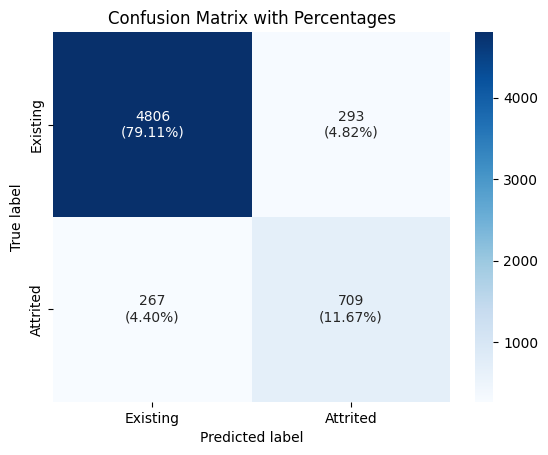

None

Validation Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.909181,0.736196,0.710059,0.722892


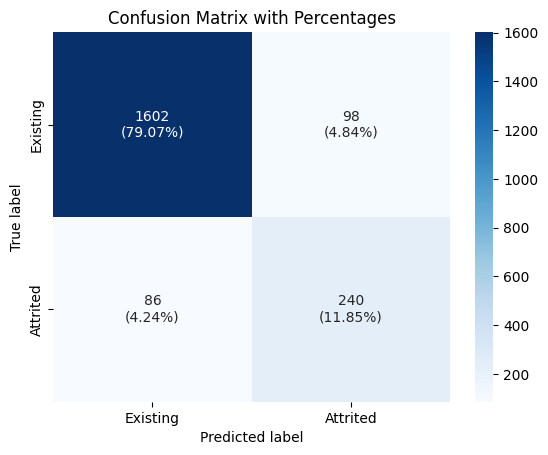

None

In [65]:
grid_cv_dtree_df_train, grid_cv_dtree_df_val = get_metrics_and_display_cm(model=dt_tuned_grid)
grid_cv_dtree_df_train.rename(index={0:"DecisionTree_GridCV"}, inplace=True)
grid_cv_dtree_df_val.rename(index={0:"DecisionTree_GridCV"}, inplace=True)

The Training Accuracy and the test accuracy is high but the recall values are low.
This indicates that model is not able to predict the churned customers correctly.

### RandomSearchCV

In [67]:
random_cv_dTree = RandomizedSearchCV(estimator=dTree,
                                   param_distributions=parameters,
                                   n_jobs = -1,
                                   n_iter=50,
                                   scoring=recall_scorer,
                                   cv=5,
                                   random_state=1)

random_cv_dTree.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(random_cv_dTree.best_params_,random_cv_dTree.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 7, 'max_depth': 9} with CV score=0.625054945054945:


Training Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.907819,0.726434,0.707585,0.716886


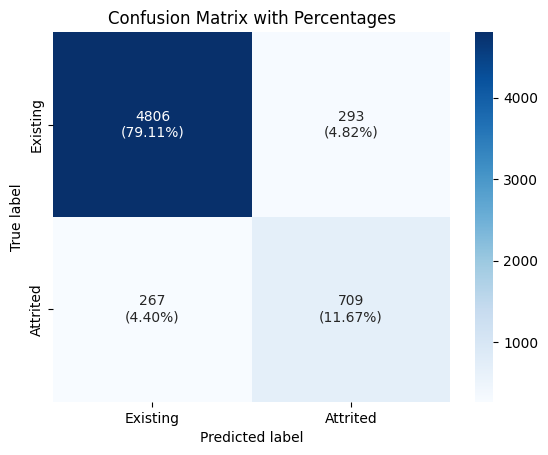

None

Validation Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.909181,0.736196,0.710059,0.722892


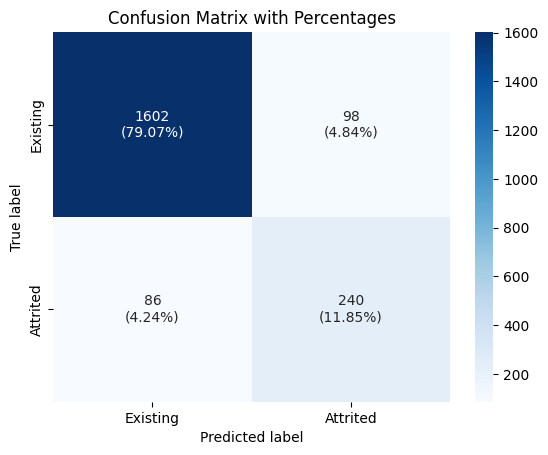

None

In [68]:
# building model with best parameters
dt_tuned_random = DecisionTreeClassifier(
     max_depth= 9,
    min_samples_leaf= 7,
    max_leaf_nodes= 7,
    min_impurity_decrease= 0.0001,
)

# Fit the model on training data
dt_tuned_random.fit(X_train, y_train)
random_cv_dtree_df_train, random_cv_dtree_df_val = get_metrics_and_display_cm(model=dt_tuned_random)
random_cv_dtree_df_train.rename(index={0:"DecisionTree_RandomCV"}, inplace=True)
random_cv_dtree_df_val.rename(index={0:"DecisionTree_RandomCV"}, inplace=True)

Using GridSearchCV and RandomSearchCv, There is no improvement in the performance. \
GridSearchCV also took time to find the best model

## Bagging (Using Decision Tree as Base Model)

In [69]:
bgcl = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

### GridSearchCV

In [70]:
parameters_bgcl = {'n_estimators': [10, 50, 75, 100],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9]
}

grid_cv_bgcl = GridSearchCV(estimator=bgcl, param_grid=parameters_bgcl, scoring=recall_scorer, cv=5, n_jobs = -1, verbose= 2)
grid_cv_bgcl.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv_bgcl.best_params_,grid_cv_bgcl.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters are {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 75} with CV score=0.8288487702773416:


Training Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


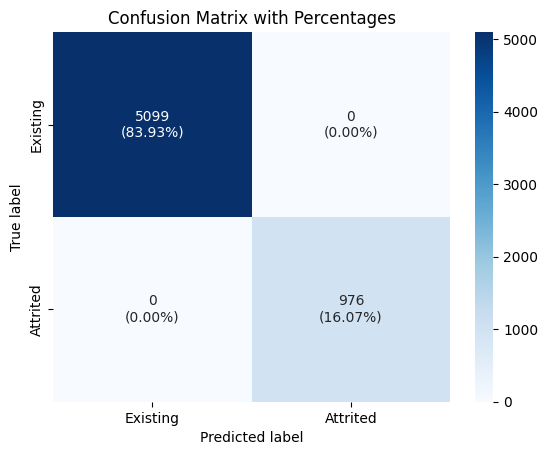

None

Validation Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.965943,0.868098,0.915858,0.891339


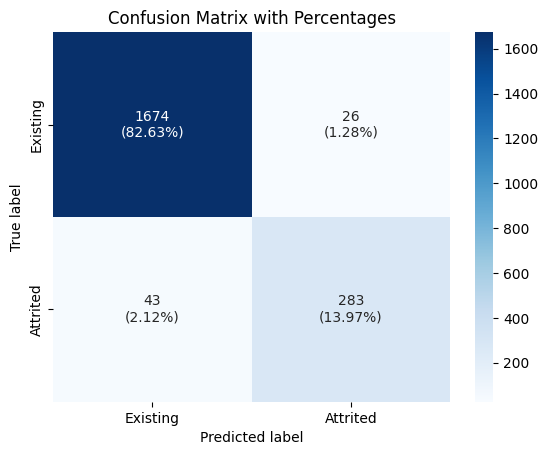

None

In [71]:
# building model with best parameters
bgcl_tuned_grid = BaggingClassifier(
     n_estimators= 75,
    max_samples= 0.9,
    max_features= 0.9,
)

# Fit the model on training data
bgcl_tuned_grid.fit(X_train, y_train)
grid_cv_bgcl_df_train, grid_cv_bgcl_df_val = get_metrics_and_display_cm(model=bgcl_tuned_grid)
grid_cv_bgcl_df_train.rename(index={0:"Bagging_GridCV"}, inplace=True)
grid_cv_bgcl_df_val.rename(index={0:"Bagging_GridCV"}, inplace=True)

The Training Accuracy is very high and the val accuracy is also very high indicating that the model is working fine.
However the Recall has also remained high but reduced during validation indicating that the model is overfitting in terms of predicting customers who will churn

### RandomSearchCV

In [72]:
random_cv_bgcl = RandomizedSearchCV(estimator=bgcl,
                                   param_distributions=parameters_bgcl,
                                   n_jobs = -1,
                                   n_iter=50,
                                   scoring=recall_scorer,
                                   cv=5,
                                   random_state=1)

random_cv_bgcl.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(random_cv_bgcl.best_params_,random_cv_bgcl.best_score_))

Best parameters are {'n_estimators': 75, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.8288487702773416:


Training Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


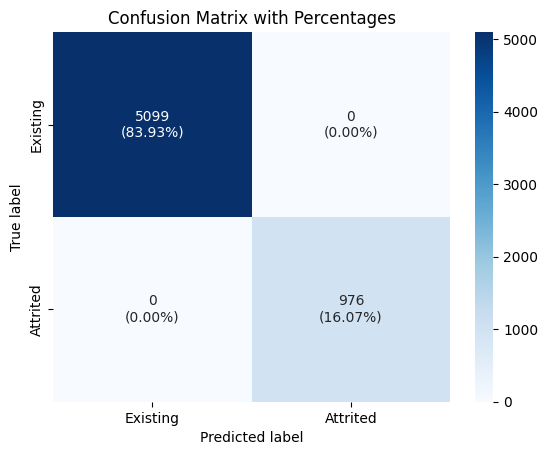

None

Validation Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.962488,0.858896,0.903226,0.880503


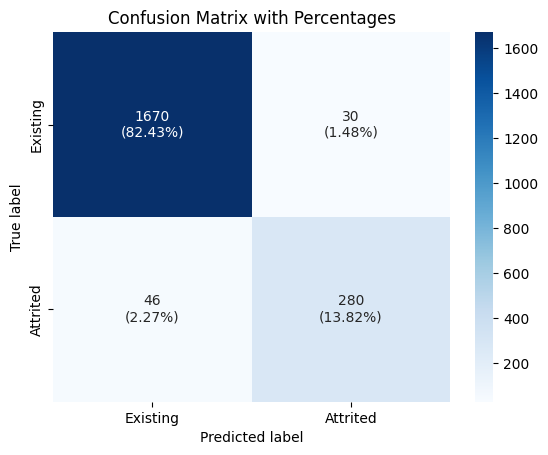

None

In [73]:
# building model with best parameters
bgcl_tuned_random = BaggingClassifier(
     n_estimators= 75,
    max_samples= 0.9,
    max_features= 0.9,
)

# Fit the model on training data
bgcl_tuned_random.fit(X_train, y_train)
random_cv_bgcl_df_train, random_cv_bgcl_df_val = get_metrics_and_display_cm(model=bgcl_tuned_random)
random_cv_bgcl_df_train.rename(index={0:"Bagging_RandomSearchCV"}, inplace=True)
random_cv_bgcl_df_val.rename(index={0:"Bagging_RandomSearchCV"}, inplace=True)

Since both the CrossValidation methods chose the same parameters, the performance is identical

## Gradient Boosting

In [74]:
gbcl = GradientBoostingClassifier(random_state=1)

### GridSearchCV

In [75]:
parameters_gb = {
    "n_estimators": [100, 200, 250],
    "learning_rate": [0.2, 0.01, 0.05],
    "subsample":[0.3, 0.4, 0.8],
    "max_features":[0.2, 0.4, 0.6]
    }

grid_cv_gbcl = GridSearchCV(estimator=gbcl, param_grid=parameters_gb, scoring=recall_scorer, cv=5, n_jobs = -1, verbose= 2)
grid_cv_gbcl.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(grid_cv_gbcl.best_params_,grid_cv_gbcl.best_score_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters are {'learning_rate': 0.2, 'max_features': 0.4, 'n_estimators': 200, 'subsample': 0.8} with CV score=0.8544897959183674:


Training Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.994568,0.974385,0.991658,0.982946


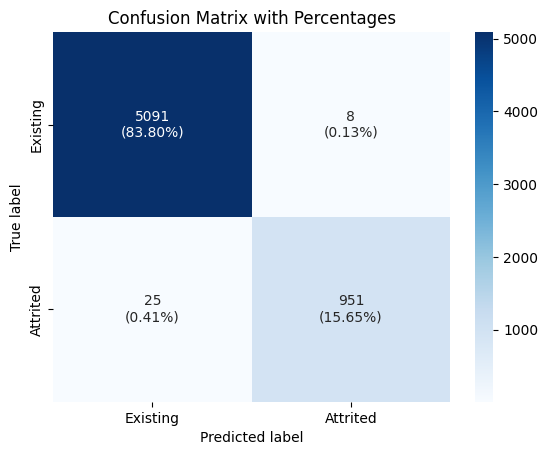

None

Validation Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.968904,0.874233,0.928339,0.900474


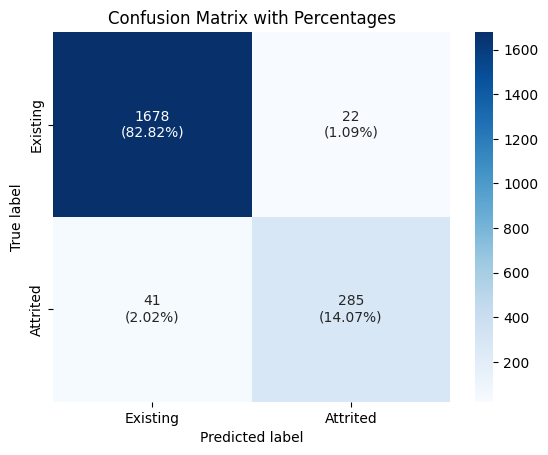

None

In [76]:
# building model with best parameters
gbcl_tuned_grid = GradientBoostingClassifier(
     n_estimators= 200,
     learning_rate = 0.2,
    subsample= 0.8,
    max_features= 0.4,
)

# Fit the model on training data
gbcl_tuned_grid.fit(X_train, y_train)
grid_cv_gbcl_df_train, grid_cv_gbcl_df_val = get_metrics_and_display_cm(model=gbcl_tuned_grid)
grid_cv_gbcl_df_train.rename(index={0:"GradientBoosting_GridCV"}, inplace=True)
grid_cv_gbcl_df_val.rename(index={0:"GradientBoosting_GridCV"}, inplace=True)

### RandomSearchCV

In [77]:
random_cv_gbcl = RandomizedSearchCV(estimator=gbcl,
                                   param_distributions=parameters_gb,
                                   n_jobs = -1,
                                   n_iter=50,
                                   scoring=recall_scorer,
                                   cv=5,
                                   random_state=1)

random_cv_gbcl.fit(X_train, y_train)
print("Best parameters are {} with CV score={}:" .format(random_cv_gbcl.best_params_,random_cv_gbcl.best_score_))

Best parameters are {'subsample': 0.8, 'n_estimators': 250, 'max_features': 0.4, 'learning_rate': 0.2} with CV score=0.8514233385661957:


Training Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.99786,0.989754,0.996904,0.993316


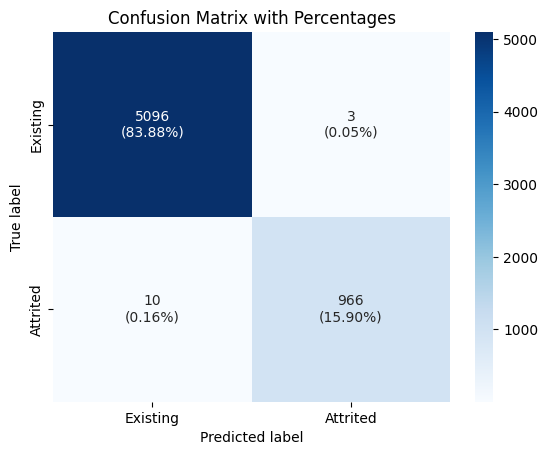

None

Validation Metrics and Confusion Matrix


,Accuracy,Recall,Precision,F1
0,0.973346,0.895706,0.935897,0.915361


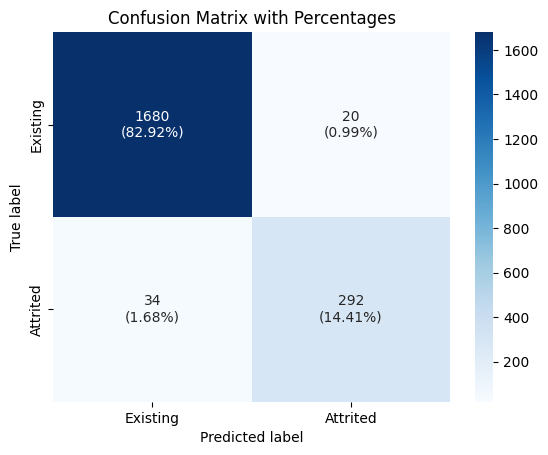

None

In [78]:
# building model with best parameters
gbcl_tuned_random = GradientBoostingClassifier(
     n_estimators= 250,
    subsample= 0.8,
    max_features= 0.4,
     learning_rate=0.2
)

# Fit the model on training data
gbcl_tuned_random.fit(X_train, y_train)
random_cv_gbcl_df_train, random_cv_gbcl_df_val = get_metrics_and_display_cm(model=gbcl_tuned_random)
random_cv_gbcl_df_train.rename(index={0:"GradientBoosting_RandomSearchCV"}, inplace=True)
random_cv_gbcl_df_val.rename(index={0:"GradientBoosting_RandomSearchCV"}, inplace=True)

Gradient Boosting Performance has also improved. Especially in Recall.
All the other metrics are also very high when RandomSearch CV is done

# Model Performance and Comparison

In [79]:
def highlight_cols(s):
    color = 'blue'
    return 'background-color: %s' % color

In [80]:
models_train_comp_df = pd.concat([
    cross_validation_df.T, cross_validation_df_over.T, cross_validation_df_un.T,
    grid_cv_dtree_df_train.T, random_cv_dtree_df_train.T, grid_cv_bgcl_df_train.T,
    random_cv_bgcl_df_train.T, grid_cv_gbcl_df_train.T, random_cv_gbcl_df_train.T], axis=1,
)

best_perf_models_train=list(models_train_comp_df.idxmax(axis=1).value_counts().index)[0]
models_train_comp_df.style.applymap(highlight_cols, subset=pd.IndexSlice[:, best_perf_models_train])

,DecisionTree,Bagging,Xgboost,Adaboost,GradientBoosting,DecisionTree_oversampled,Bagging_oversampled,Xgboost_oversampled,Adaboost_oversampled,GradientBoosting_oversampled,DecisionTree_undersampled,Bagging_undersampled,Xgboost_undersampled,Adaboost_undersampled,GradientBoosting_undersampled,DecisionTree_GridCV,DecisionTree_RandomCV,Bagging_GridCV,Bagging_RandomSearchCV,GradientBoosting_GridCV,GradientBoosting_RandomSearchCV
Accuracy,0.932000,0.950000,0.963000,0.950000,0.960000,0.941000,0.961000,0.982000,0.956000,0.971000,0.884000,0.916000,0.940000,0.925000,0.935000,0.907819,0.907819,1.000000,1.000000,0.994568,0.997860
Recall,0.786000,0.795000,0.864000,0.813000,0.817000,0.942000,0.961000,0.983000,0.960000,0.973000,0.881000,0.913000,0.950000,0.931000,0.940000,0.726434,0.726434,1.000000,1.000000,0.974385,0.989754
Precision,0.791000,0.881000,0.905000,0.871000,0.925000,0.940000,0.961000,0.982000,0.952000,0.969000,0.887000,0.919000,0.932000,0.919000,0.931000,0.707585,0.707585,1.000000,1.000000,0.991658,0.996904
F1,0.788000,0.835000,0.884000,0.841000,0.867000,0.941000,0.961000,0.982000,0.956000,0.971000,0.884000,0.916000,0.941000,0.925000,0.935000,0.716886,0.716886,1.000000,1.000000,0.982946,0.993316


In [81]:
models_val_comp_df = pd.concat([
    val_df.T, val_df_over.T, val_df_un.T,
    grid_cv_dtree_df_val.T, random_cv_dtree_df_val.T, grid_cv_bgcl_df_val.T,
    random_cv_bgcl_df_val.T, grid_cv_gbcl_df_val.T, random_cv_gbcl_df_val.T], axis=1,
)

best_perf_models_val=list(models_val_comp_df.idxmax(axis=1).value_counts().index)[0]
models_val_comp_df.style.applymap(highlight_cols, subset=pd.IndexSlice[:, best_perf_models_val])

,DecisionTree,Bagging,Xgboost,Adaboost,GradientBoosting,DecisionTree_oversampled,Bagging_oversampled,Xgboost_oversampled,Adaboost_oversampled,GradientBoosting_oversampled,DecisionTree_undersampled,Bagging_undersampled,Xgboost_undersampled,Adaboost_undersampled,GradientBoosting_undersampled,DecisionTree_GridCV,DecisionTree_RandomCV,Bagging_GridCV,Bagging_RandomSearchCV,GradientBoosting_GridCV,GradientBoosting_RandomSearchCV
Accuracy,0.936000,0.957000,0.971000,0.960000,0.968000,0.914000,0.945000,0.965000,0.948000,0.958000,0.888000,0.923000,0.946000,0.929000,0.935000,0.909181,0.909181,0.965943,0.962488,0.968904,0.973346
Recall,0.816000,0.831000,0.890000,0.859000,0.865000,0.816000,0.834000,0.902000,0.911000,0.902000,0.893000,0.926000,0.966000,0.960000,0.960000,0.736196,0.736196,0.868098,0.858896,0.874233,0.895706
Precision,0.794000,0.891000,0.927000,0.889000,0.934000,0.698000,0.827000,0.886000,0.794000,0.845000,0.602000,0.696000,0.761000,0.705000,0.726000,0.710059,0.710059,0.915858,0.903226,0.928339,0.935897
F1,0.805000,0.860000,0.908000,0.874000,0.898000,0.752000,0.831000,0.894000,0.849000,0.872000,0.719000,0.795000,0.851000,0.813000,0.827000,0.722892,0.722892,0.891339,0.880503,0.900474,0.915361


## Best Model Performance on Test Dataset

,Accuracy,Recall,Precision,F1
0,0.980257,0.926154,0.949527,0.937695


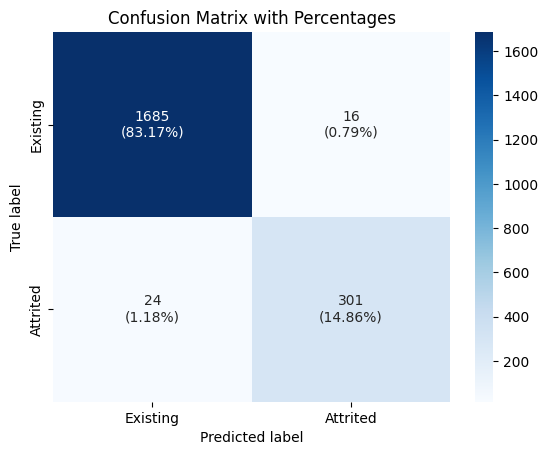

None

In [82]:
final_model_metrics = calculate_metrics_and_confusion_matrix(gbcl_tuned_random, test_set=X_test, target=y_test, metrics=True)
display(calculate_metrics_and_confusion_matrix(gbcl_tuned_random, test_set=X_test, target=y_test, metrics=False, cm_=True, labels=["Existing", "Attrited"]))

The Best Model performance is shown by GradientBoosting which has undergone RandomSearch Cross Validation. The metrics calculated are high in Training as well as Validation.

Running the model on Test Dataset has also shown that the model is giving very performance. The Recall and precision rates are very high indicating that the model is able to learn who will churn and who will not churn

# Business Recommendations

To reduce customer churn, Thera Bank should:

* **Target high-risk segments**: Focus on retaining customers with lower incomes and Blue Cards.
* **Boost engagement**: Encourage credit card usage and offer personalized rewards.
Review credit limits: Offer higher credit limits and easier upgrade paths.
* **Promote product bundles**: Incentivize customers to use multiple products.
* **Personalize customer service**: Provide tailored support and address pain points.
* **Address demographics**: Develop offerings for divorced and lower-educated segments.
* **Monitor and adapt**: Track attrition trends and refine retention strategies.

These actions will help Thera Bank build stronger relationships with customers and reduce churn.